In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#**MODEL SVM**

## 10Fold CV

In [ ]:


def svm_cv(X, y):
    # Membuat model SVC
    model = SVC(kernel='poly', degree=7, C=10)

    # Melakukan 10-Fold Cross Validation
    svm_cv_pred = cross_val_predict(model, X, y, cv=10)

    # Menghitung confusion matrix
    conf_mat = confusion_matrix(y, svm_cv_pred)

    # Hitung sensitivity
    sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis=1)

    # Hitung specificity
    specificity = []
    for i in range(conf_mat.shape[0]):
        true_negatives = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + conf_mat[i, i]
        true_negatives = true_negatives / (np.sum(conf_mat) - np.sum(conf_mat[i, :]))
        specificity.append(true_negatives)

    # Hitung akurasi
    accuracy = accuracy_score(y, svm_cv_pred)

    # Hitung F1-score
    f1_scores = f1_score(y, svm_cv_pred, average=None)

    # Tampilkan hasil
    classes = np.unique(y)
    for i, class_name in enumerate(classes):
        print("Class:", class_name)
        print("Sensitivity:", sensitivity[i])
        print("Specificity:", specificity[i])
        print("Accuracy: {:.2f}".format(accuracy))
        print("F1-score: {:.2f}".format(f1_scores[i]))
        print()

    avg_sensitivity = np.mean(sensitivity)
    avg_specificity = np.mean(specificity)
    avg_accuracy = np.mean(accuracy)
    avg_f1_score = np.mean(f1_scores)

    print("\nAverage Sensitivity: {:.2f}".format(avg_sensitivity))
    print("Average Specificity: {:.2f}".format(avg_specificity))
    print("Average Accuracy: {:.2f}".format(avg_accuracy))
    print("Average F1-score: {:.2f}".format(avg_f1_score))

    # Mencetak nilai Sensitivity, Specificity, dan Accuracy
    print(classification_report(y, svm_cv_pred))

    # Membuat heatmap dari confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


## 75% Train, 25% Test

In [ ]:
def svm_train_test(model, X_test, y_test):
    # Make predictions on the test data
    pred= model.predict(X_test)

# Menghitung confusion matrix
    conf_mat = confusion_matrix(y_test, pred)

  # Hitung sensitivity
    sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis=1)

# Hitung specificity
    specificity = []
    for i in range(conf_mat.shape[0]):
        true_negatives = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + conf_mat[i, i]
        true_negatives = true_negatives / (np.sum(conf_mat) - np.sum(conf_mat[i, :]))
        specificity.append(true_negatives)

# Hitung akurasi
    accuracy = accuracy_score(y_test, pred)

 # Hitung F1-score
    f1_scores = f1_score(y_test, pred, average=None)
# Tampilkan hasil
    classes = np.unique(y_test)
    for i, class_name in enumerate(classes):
        print("Class:", class_name)
        print("Sensitivity:", sensitivity[i])
        print("Specificity:", specificity[i])
        print("Accuracy: {:.2f}".format(accuracy))
        print("F1-score: {:.2f}".format(f1_scores[i]))
        print()

    avg_sensitivity = np.mean(sensitivity)
    avg_specificity = np.mean(specificity)
    avg_accuracy = np.mean(accuracy)
    avg_f1_score = np.mean(f1_scores)

    print("\nAverage Sensitivity: {:.2f}".format(avg_sensitivity))
    print("Average Specificity: {:.2f}".format(avg_specificity))
    print("Average Accuracy: {:.2f}".format(avg_accuracy))
    print("Average F1-score: {:.2f}".format(avg_f1_score))

    # Mencetak nilai Sensitivity, Specificity, dan Accuracy
    print(classification_report(y_test, pred))

 # Membuat heatmap dari confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()



## 50% Train, 25% Validation, 25% Test

In [ ]:
def svm_train_validation_test(model, X_test, y_test):
    # Make predictions on the validation data
    predictions = model.predict(X_test)

   # Menghitung confusion matrix
    conf_mat = confusion_matrix(y_test, predictions)

  # Hitung sensitivity
    sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis=1)

# Hitung specificity
    specificity = []
    for i in range(conf_mat.shape[0]):
        true_negatives = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + conf_mat[i, i]
        true_negatives = true_negatives / (np.sum(conf_mat) - np.sum(conf_mat[i, :]))
        specificity.append(true_negatives)

# Hitung akurasi
    accuracy = accuracy_score(y_test, predictions)

 # Hitung F1-score
    f1_scores = f1_score(y_test, predictions, average=None)

# Tampilkan hasil
    classes = np.unique(y_test)
    for i, class_name in enumerate(classes):
        print("Class:", class_name)
        print("Sensitivity:", sensitivity[i])
        print("Specificity:", specificity[i])
        print("Accuracy: {:.2f}".format(accuracy))
        print("F1-score: {:.2f}".format(f1_scores[i]))
        print()

    avg_sensitivity = np.mean(sensitivity)
    avg_specificity = np.mean(specificity)
    avg_accuracy = np.mean(accuracy)
    avg_f1_score = np.mean(f1_scores)

    print("\nAverage Sensitivity: {:.2f}".format(avg_sensitivity))
    print("Average Specificity: {:.2f}".format(avg_specificity))
    print("Average Accuracy: {:.2f}".format(avg_accuracy))
    print("Average F1-score: {:.2f}".format(avg_f1_score))

    # Mencetak nilai Sensitivity, Specificity, dan Accuracy
    print(classification_report(y_test, predictions))

 # Membuat heatmap dari confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


#**MODEL KNN**

## 10Fold CV

In [ ]:
def knn_cv(X, y):
    # Membuat model SVC
    model_knn = KNeighborsClassifier(n_neighbors=5)

    # Melakukan 10-Fold Cross Validation
    knn_cv_pred = cross_val_predict(model_knn, X, y, cv=10)

    # Menghitung confusion matrix
    conf_mat = confusion_matrix(y, knn_cv_pred)

  # Hitung sensitivity
    sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis=1)

# Hitung specificity
    specificity = []
    for i in range(conf_mat.shape[0]):
        true_negatives = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + conf_mat[i, i]
        true_negatives = true_negatives / (np.sum(conf_mat) - np.sum(conf_mat[i, :]))
        specificity.append(true_negatives)

# Hitung akurasi
    accuracy = accuracy_score(y, knn_cv_pred)

# Hitung F1-score
    f1_scores = f1_score(y, knn_cv_pred, average=None)
# Tampilkan hasil
    classes = np.unique(y)
    for i, class_name in enumerate(classes):
        print("Class:", class_name)
        print("Sensitivity:", sensitivity[i])
        print("Specificity:", specificity[i])
        print("Accuracy: {:.2f}".format(accuracy))
        print("F1-score: {:.2f}".format(f1_scores[i]))
        print()

    avg_sensitivity = np.mean(sensitivity)
    avg_specificity = np.mean(specificity)
    avg_accuracy = np.mean(accuracy)
    avg_f1_score = np.mean(f1_scores)

    print("\nAverage Sensitivity: {:.2f}".format(avg_sensitivity))
    print("Average Specificity: {:.2f}".format(avg_specificity))
    print("Average Accuracy: {:.2f}".format(avg_accuracy))
    print("Average F1-score: {:.2f}".format(avg_f1_score))

    # Mencetak nilai Sensitivity, Specificity, dan Accuracy
    print(classification_report(y, knn_cv_pred))

 # Membuat heatmap dari confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


## 75% Train, 25% Test

In [ ]:
def knn_train_test(model, X_test, y_test):
    # Make predictions on the test data
    pred_knn_tt= model.predict(X_test)

# Menghitung confusion matrix
    conf_mat = confusion_matrix(y_test, pred_knn_tt)

  # Hitung sensitivity
    sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis=1)

# Hitung specificity
    specificity = []
    for i in range(conf_mat.shape[0]):
        true_negatives = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + conf_mat[i, i]
        true_negatives = true_negatives / (np.sum(conf_mat) - np.sum(conf_mat[i, :]))
        specificity.append(true_negatives)

# Hitung akurasi
    accuracy = accuracy_score(y_test, pred_knn_tt)

# Hitung F1-score
    f1_scores = f1_score(y_test, pred_knn_tt, average=None)

# Tampilkan hasil
    classes = np.unique(y_test)
    for i, class_name in enumerate(classes):
        print("Class:", class_name)
        print("Sensitivity:", sensitivity[i])
        print("Specificity:", specificity[i])
        print("Accuracy: {:.2f}".format(accuracy))
        print("F1-score: {:.2f}".format(f1_scores[i]))
        print()

    avg_sensitivity = np.mean(sensitivity)
    avg_specificity = np.mean(specificity)
    avg_accuracy = np.mean(accuracy)
    avg_f1_score = np.mean(f1_scores)

    print("\nAverage Sensitivity: {:.2f}".format(avg_sensitivity))
    print("Average Specificity: {:.2f}".format(avg_specificity))
    print("Average Accuracy: {:.2f}".format(avg_accuracy))
    print("Average F1-score: {:.2f}".format(avg_f1_score))

    # Mencetak nilai Sensitivity, Specificity, dan Accuracy
    print(classification_report(y_test, pred_knn_tt))

 # Membuat heatmap dari confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()



## 50% Train, 25% Validation, 25% Test

In [ ]:
def knn_train_validation_test(model, X_test, y_test):
    # Make predictions on the validation data
    predictions = model.predict(X_test)

   # Menghitung confusion matrix
    conf_mat = confusion_matrix(y_test, predictions)

  # Hitung sensitivity
    sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis=1)

# Hitung specificity
    specificity = []
    for i in range(conf_mat.shape[0]):
        true_negatives = np.sum(conf_mat) - np.sum(conf_mat[i, :]) - np.sum(conf_mat[:, i]) + conf_mat[i, i]
        true_negatives = true_negatives / (np.sum(conf_mat) - np.sum(conf_mat[i, :]))
        specificity.append(true_negatives)

# Hitung akurasi
    accuracy = accuracy_score(y_test, predictions)

# Hitung F1-score
    f1_scores = f1_score(y_test,  predictions, average=None)

# Tampilkan hasil
    classes = np.unique(y_test)
    for i, class_name in enumerate(classes):
        print("Class:", class_name)
        print("Sensitivity:", sensitivity[i])
        print("Specificity:", specificity[i])
        print("Accuracy: {:.2f}".format(accuracy))
        print("F1-score: {:.2f}".format(f1_scores[i]))
        print()

    avg_sensitivity = np.mean(sensitivity)
    avg_specificity = np.mean(specificity)
    avg_accuracy = np.mean(accuracy)
    avg_f1_score = np.mean(f1_scores)

    print("\nAverage Sensitivity: {:.2f}".format(avg_sensitivity))
    print("Average Specificity: {:.2f}".format(avg_specificity))
    print("Average Accuracy: {:.2f}".format(avg_accuracy))
    print("Average F1-score: {:.2f}".format(avg_f1_score))

    # Mencetak nilai Sensitivity, Specificity, dan Accuracy
    print(classification_report(y_test, predictions))

 # Membuat heatmap dari confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


# **CPA 1**

In [ ]:
cpa1 = pd.read_excel('/content/drive/MyDrive/SLO/cpa/CPA1.xlsx')

In [ ]:
print(cpa1.columns.tolist())
print(f"Jumlah kelas: {cpa1['kelas'].nunique()}\n")
print("Jumlah data per kelas:")
display(cpa1['kelas'].value_counts())


['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5', 'kelas']
Jumlah kelas: 2

Jumlah data per kelas:


kelas
A    100
E    100
Name: count, dtype: int64

In [ ]:
X = cpa1[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpa1['kelas']

## SVM

### 10Fold CV

Class: A
Sensitivity: 0.83
Specificity: 0.8
Accuracy: 0.81
F1-score: 0.82

Class: E
Sensitivity: 0.8
Specificity: 0.83
Accuracy: 0.81
F1-score: 0.81


Average Sensitivity: 0.81
Average Specificity: 0.81
Average Accuracy: 0.81
Average F1-score: 0.81
              precision    recall  f1-score   support

           A       0.81      0.83      0.82       100
           E       0.82      0.80      0.81       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



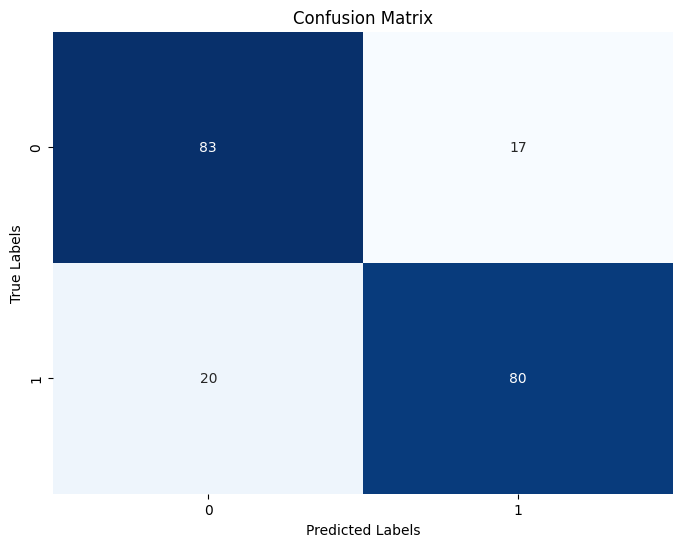

In [ ]:
svm_cv(X,y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 150
Jumlah data test: 50


Class: A
Sensitivity: 0.8148148148148148
Specificity: 0.7391304347826086
Accuracy: 0.78
F1-score: 0.80

Class: E
Sensitivity: 0.7391304347826086
Specificity: 0.8148148148148148
Accuracy: 0.78
F1-score: 0.76


Average Sensitivity: 0.78
Average Specificity: 0.78
Average Accuracy: 0.78
Average F1-score: 0.78
              precision    recall  f1-score   support

           A       0.79      0.81      0.80        27
           E       0.77      0.74      0.76        23

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



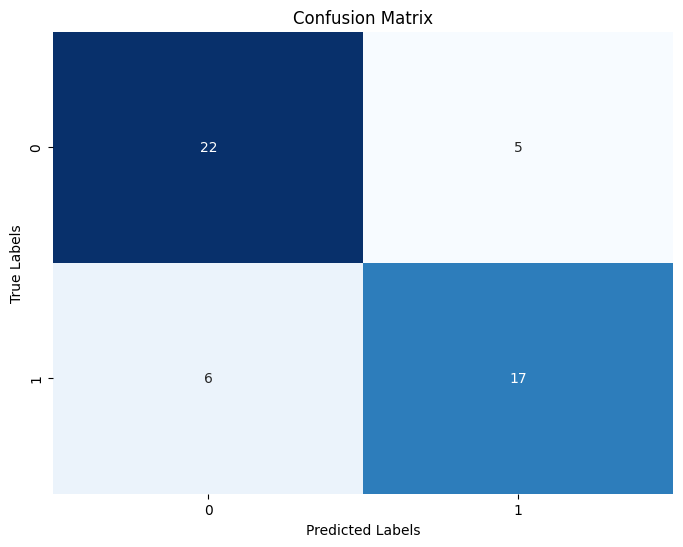

In [ ]:
svm_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


Class: A
Sensitivity: 0.9310344827586207
Specificity: 0.7142857142857143
Accuracy: 0.84
F1-score: 0.87

Class: E
Sensitivity: 0.7142857142857143
Specificity: 0.9310344827586207
Accuracy: 0.84
F1-score: 0.79


Average Sensitivity: 0.82
Average Specificity: 0.82
Average Accuracy: 0.84
Average F1-score: 0.83
              precision    recall  f1-score   support

           A       0.82      0.93      0.87        29
           E       0.88      0.71      0.79        21

    accuracy                           0.84        50
   macro avg       0.85      0.82      0.83        50
weighted avg       0.85      0.84      0.84        50



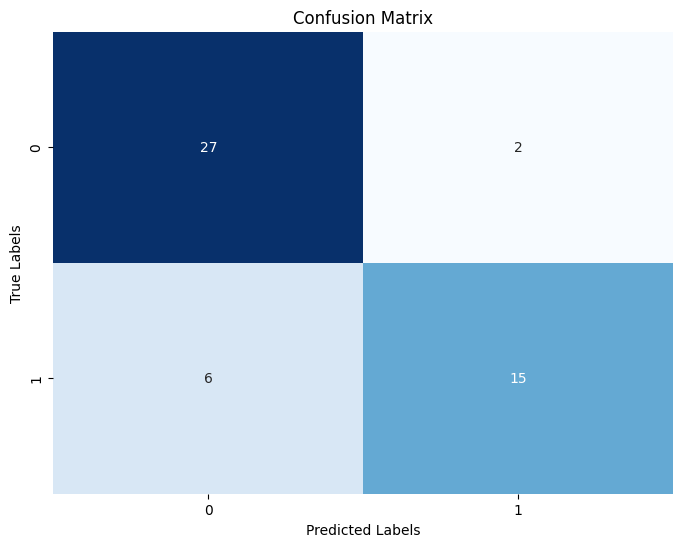

In [ ]:
svm_train_validation_test(model, X_test, y_test)

## KNN

### 10Fold CV

Class: A
Sensitivity: 0.77
Specificity: 0.7
Accuracy: 0.73
F1-score: 0.74

Class: E
Sensitivity: 0.7
Specificity: 0.77
Accuracy: 0.73
F1-score: 0.73


Average Sensitivity: 0.73
Average Specificity: 0.73
Average Accuracy: 0.73
Average F1-score: 0.73
              precision    recall  f1-score   support

           A       0.72      0.77      0.74       100
           E       0.75      0.70      0.73       100

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



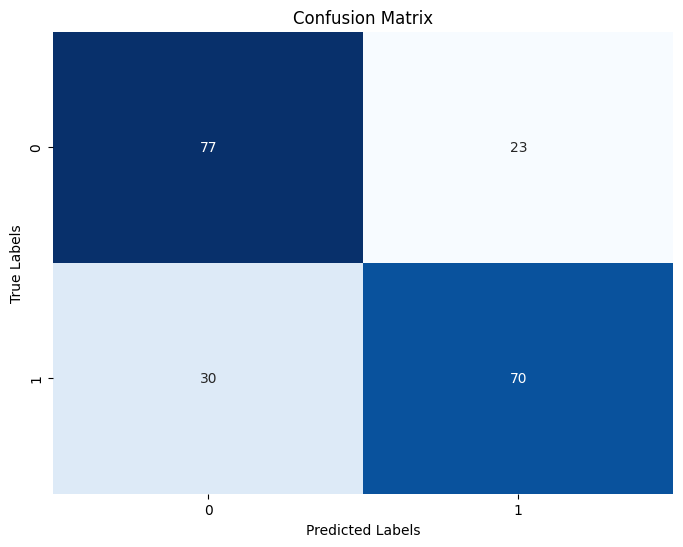

In [ ]:
knn_cv(X, y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 150
Jumlah data test: 50


KNeighborsClassifier()

Class: A
Sensitivity: 0.7777777777777778
Specificity: 0.7391304347826086
Accuracy: 0.76
F1-score: 0.78

Class: E
Sensitivity: 0.7391304347826086
Specificity: 0.7777777777777778
Accuracy: 0.76
F1-score: 0.74


Average Sensitivity: 0.76
Average Specificity: 0.76
Average Accuracy: 0.76
Average F1-score: 0.76
              precision    recall  f1-score   support

           A       0.78      0.78      0.78        27
           E       0.74      0.74      0.74        23

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50



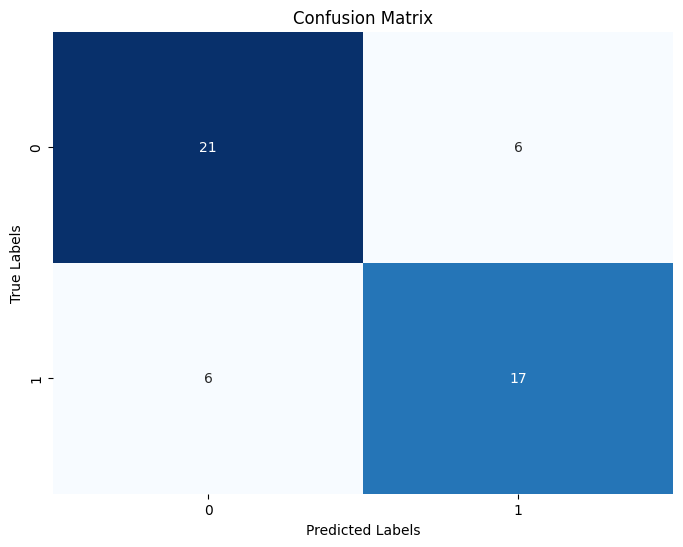

In [ ]:
knn_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


KNeighborsClassifier()

Class: A
Sensitivity: 0.6206896551724138
Specificity: 0.6190476190476191
Accuracy: 0.62
F1-score: 0.65

Class: E
Sensitivity: 0.6190476190476191
Specificity: 0.6206896551724138
Accuracy: 0.62
F1-score: 0.58


Average Sensitivity: 0.62
Average Specificity: 0.62
Average Accuracy: 0.62
Average F1-score: 0.62
              precision    recall  f1-score   support

           A       0.69      0.62      0.65        29
           E       0.54      0.62      0.58        21

    accuracy                           0.62        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.63      0.62      0.62        50



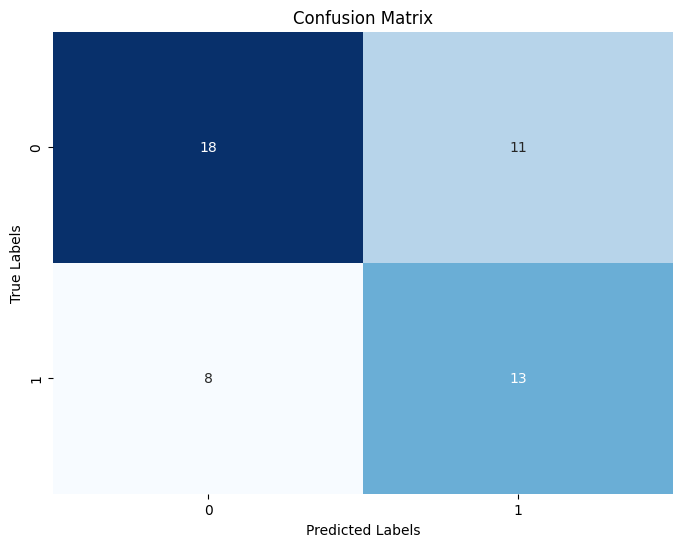

In [ ]:
knn_train_validation_test(model, X_test, y_test)

# **CPA 2**

In [ ]:
cpa2 = pd.read_excel('/content/drive/MyDrive/SLO/cpa/CPA2.xlsx')

In [ ]:
print(cpa2.columns.tolist())
print(f"Jumlah kelas: {cpa2['kelas'].nunique()}\n")
print("Jumlah data per kelas:")
display(cpa2['kelas'].value_counts())


['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5', 'kelas']
Jumlah kelas: 2

Jumlah data per kelas:


kelas
B    100
E    100
Name: count, dtype: int64

In [ ]:
X = cpa2[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpa2['kelas']

## SVM

### 10Fold CV

Class: B
Sensitivity: 0.59
Specificity: 0.76
Accuracy: 0.68
F1-score: 0.64

Class: E
Sensitivity: 0.76
Specificity: 0.59
Accuracy: 0.68
F1-score: 0.70


Average Sensitivity: 0.68
Average Specificity: 0.68
Average Accuracy: 0.68
Average F1-score: 0.67
              precision    recall  f1-score   support

           B       0.71      0.59      0.64       100
           E       0.65      0.76      0.70       100

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.68      0.68      0.67       200



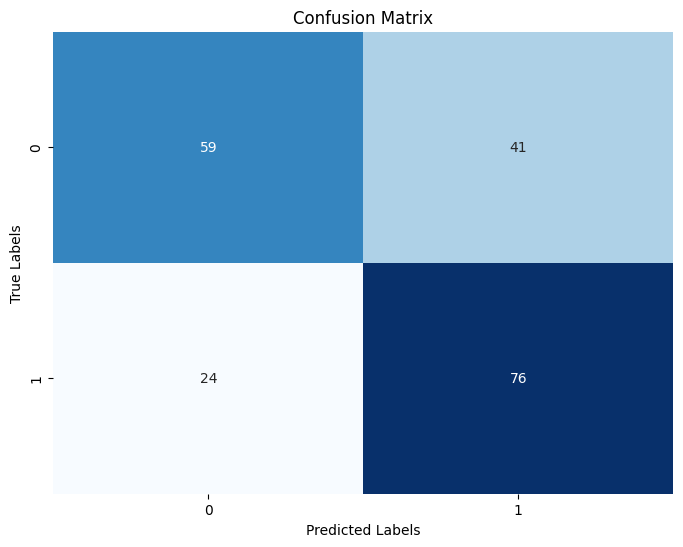

In [ ]:
svm_cv(X,y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 150
Jumlah data test: 50


Class: B
Sensitivity: 0.5555555555555556
Specificity: 1.0
Accuracy: 0.76
F1-score: 0.71

Class: E
Sensitivity: 1.0
Specificity: 0.5555555555555556
Accuracy: 0.76
F1-score: 0.79


Average Sensitivity: 0.78
Average Specificity: 0.78
Average Accuracy: 0.76
Average F1-score: 0.75
              precision    recall  f1-score   support

           B       1.00      0.56      0.71        27
           E       0.66      1.00      0.79        23

    accuracy                           0.76        50
   macro avg       0.83      0.78      0.75        50
weighted avg       0.84      0.76      0.75        50



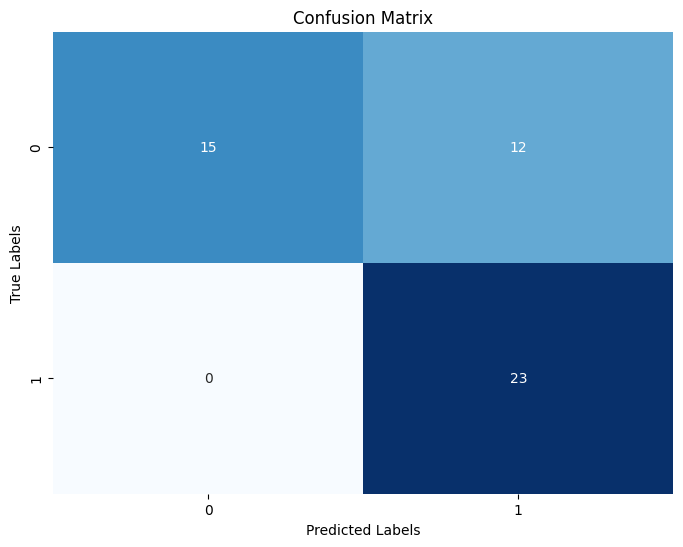

In [ ]:
svm_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


Class: B
Sensitivity: 0.4827586206896552
Specificity: 0.9523809523809523
Accuracy: 0.68
F1-score: 0.64

Class: E
Sensitivity: 0.9523809523809523
Specificity: 0.4827586206896552
Accuracy: 0.68
F1-score: 0.71


Average Sensitivity: 0.72
Average Specificity: 0.72
Average Accuracy: 0.68
Average F1-score: 0.68
              precision    recall  f1-score   support

           B       0.93      0.48      0.64        29
           E       0.57      0.95      0.71        21

    accuracy                           0.68        50
   macro avg       0.75      0.72      0.68        50
weighted avg       0.78      0.68      0.67        50



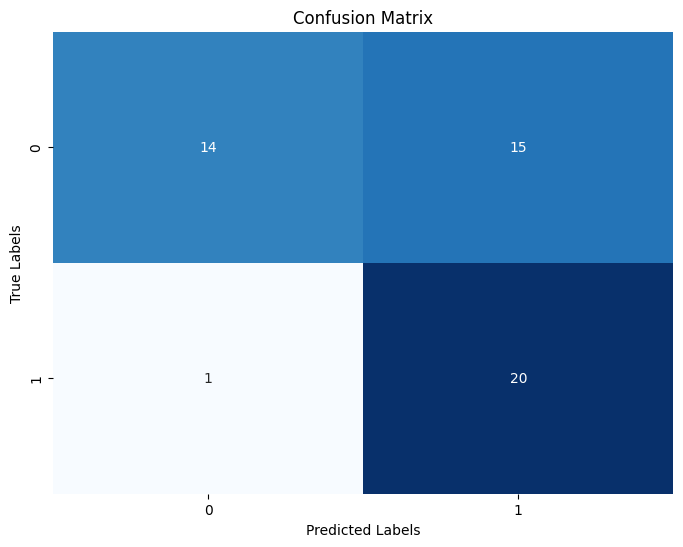

In [ ]:
svm_train_validation_test(model, X_test, y_test)

## KNN

### 10Fold CV

Class: B
Sensitivity: 0.8
Specificity: 0.66
Accuracy: 0.73
F1-score: 0.75

Class: E
Sensitivity: 0.66
Specificity: 0.8
Accuracy: 0.73
F1-score: 0.71


Average Sensitivity: 0.73
Average Specificity: 0.73
Average Accuracy: 0.73
Average F1-score: 0.73
              precision    recall  f1-score   support

           B       0.70      0.80      0.75       100
           E       0.77      0.66      0.71       100

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



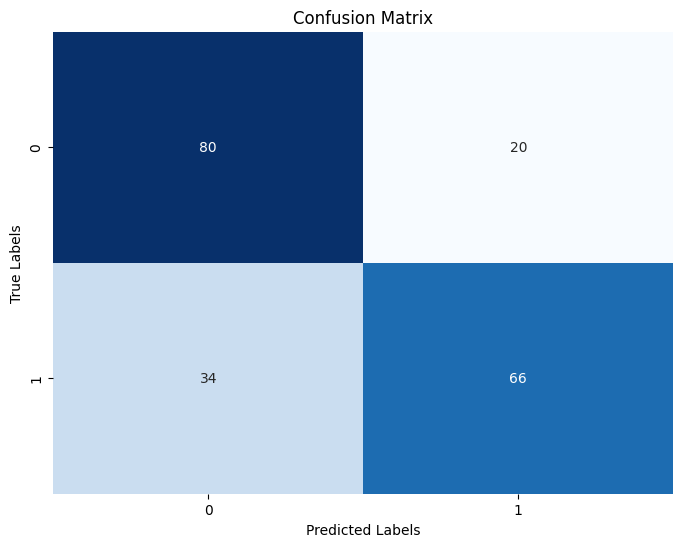

In [ ]:
knn_cv(X, y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 150
Jumlah data test: 50


KNeighborsClassifier()

Class: B
Sensitivity: 0.8148148148148148
Specificity: 0.8260869565217391
Accuracy: 0.82
F1-score: 0.83

Class: E
Sensitivity: 0.8260869565217391
Specificity: 0.8148148148148148
Accuracy: 0.82
F1-score: 0.81


Average Sensitivity: 0.82
Average Specificity: 0.82
Average Accuracy: 0.82
Average F1-score: 0.82
              precision    recall  f1-score   support

           B       0.85      0.81      0.83        27
           E       0.79      0.83      0.81        23

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50



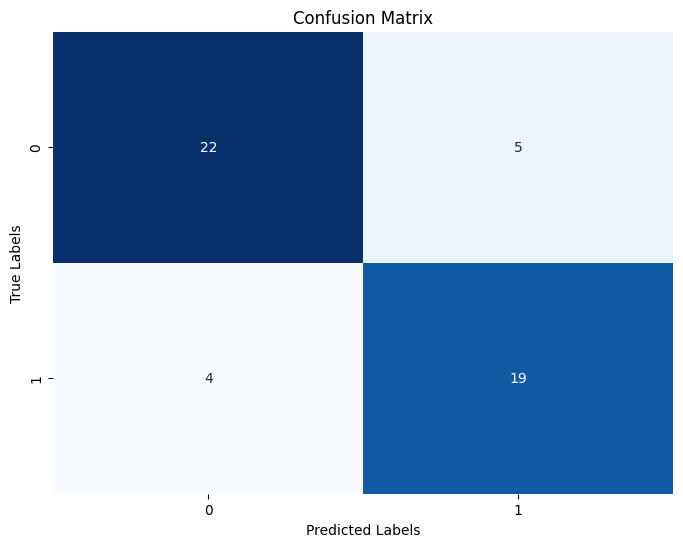

In [ ]:
knn_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


KNeighborsClassifier()

Class: B
Sensitivity: 0.5517241379310345
Specificity: 0.8095238095238095
Accuracy: 0.66
F1-score: 0.65

Class: E
Sensitivity: 0.8095238095238095
Specificity: 0.5517241379310345
Accuracy: 0.66
F1-score: 0.67


Average Sensitivity: 0.68
Average Specificity: 0.68
Average Accuracy: 0.66
Average F1-score: 0.66
              precision    recall  f1-score   support

           B       0.80      0.55      0.65        29
           E       0.57      0.81      0.67        21

    accuracy                           0.66        50
   macro avg       0.68      0.68      0.66        50
weighted avg       0.70      0.66      0.66        50



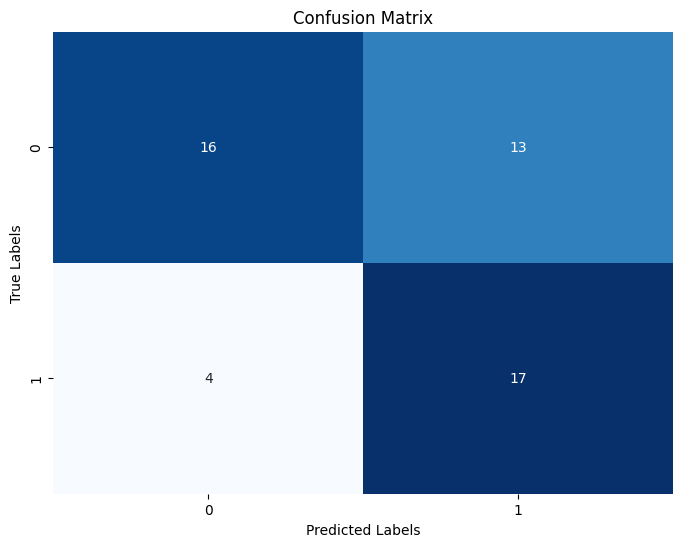

In [ ]:
knn_train_validation_test(model, X_test, y_test)

# **CPA 3**

In [ ]:
cpa3 = pd.read_excel('/content/drive/MyDrive/SLO/cpa/CPA3.xlsx')

In [ ]:
print(cpa3.columns.tolist())
print(f"Jumlah kelas: {cpa3['kelas'].nunique()}\n")
print("Jumlah data per kelas:")
display(cpa3['kelas'].value_counts())


['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5', 'kelas']
Jumlah kelas: 2

Jumlah data per kelas:


kelas
A    200
E    100
Name: count, dtype: int64

In [ ]:
X = cpa3[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpa3['kelas']

## SVM

### 10Fold CV

Class: A
Sensitivity: 0.87
Specificity: 0.31
Accuracy: 0.68
F1-score: 0.79

Class: E
Sensitivity: 0.31
Specificity: 0.87
Accuracy: 0.68
F1-score: 0.39


Average Sensitivity: 0.59
Average Specificity: 0.59
Average Accuracy: 0.68
Average F1-score: 0.59
              precision    recall  f1-score   support

           A       0.72      0.87      0.79       200
           E       0.54      0.31      0.39       100

    accuracy                           0.68       300
   macro avg       0.63      0.59      0.59       300
weighted avg       0.66      0.68      0.66       300



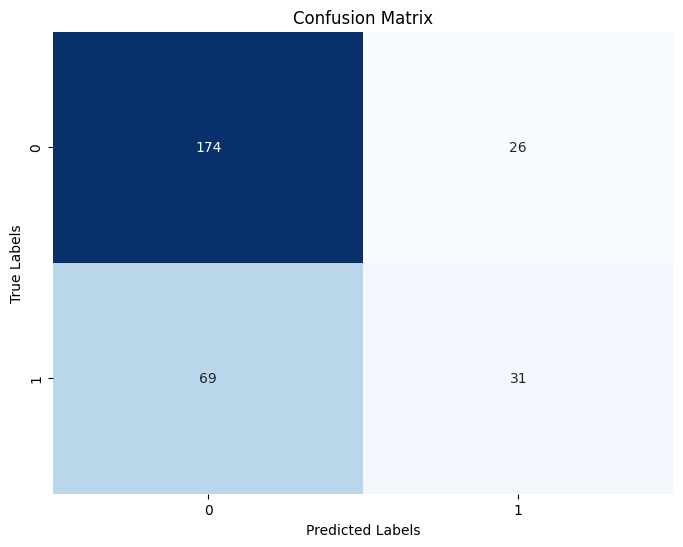

In [ ]:
svm_cv(X,y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 225
Jumlah data test: 75


Class: A
Sensitivity: 0.96
Specificity: 0.24
Accuracy: 0.72
F1-score: 0.82

Class: E
Sensitivity: 0.24
Specificity: 0.96
Accuracy: 0.72
F1-score: 0.36


Average Sensitivity: 0.60
Average Specificity: 0.60
Average Accuracy: 0.72
Average F1-score: 0.59
              precision    recall  f1-score   support

           A       0.72      0.96      0.82        50
           E       0.75      0.24      0.36        25

    accuracy                           0.72        75
   macro avg       0.73      0.60      0.59        75
weighted avg       0.73      0.72      0.67        75



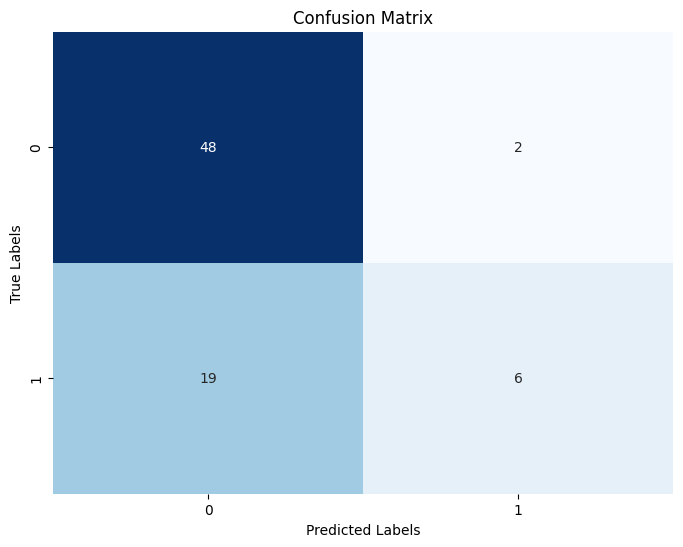

In [ ]:
svm_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: A
Sensitivity: 0.7547169811320755
Specificity: 0.5454545454545454
Accuracy: 0.69
F1-score: 0.78

Class: E
Sensitivity: 0.5454545454545454
Specificity: 0.7547169811320755
Accuracy: 0.69
F1-score: 0.51


Average Sensitivity: 0.65
Average Specificity: 0.65
Average Accuracy: 0.69
Average F1-score: 0.64
              precision    recall  f1-score   support

           A       0.80      0.75      0.78        53
           E       0.48      0.55      0.51        22

    accuracy                           0.69        75
   macro avg       0.64      0.65      0.64        75
weighted avg       0.71      0.69      0.70        75



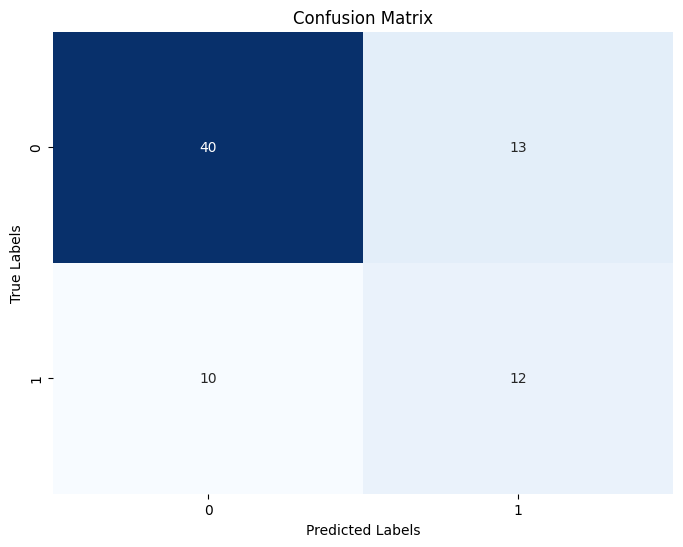

In [ ]:
svm_train_validation_test(model, X_test, y_test)

## KNN

### 10Fold CV

Class: A
Sensitivity: 0.86
Specificity: 0.54
Accuracy: 0.75
F1-score: 0.82

Class: E
Sensitivity: 0.54
Specificity: 0.86
Accuracy: 0.75
F1-score: 0.59


Average Sensitivity: 0.70
Average Specificity: 0.70
Average Accuracy: 0.75
Average F1-score: 0.71
              precision    recall  f1-score   support

           A       0.79      0.86      0.82       200
           E       0.66      0.54      0.59       100

    accuracy                           0.75       300
   macro avg       0.72      0.70      0.71       300
weighted avg       0.75      0.75      0.75       300



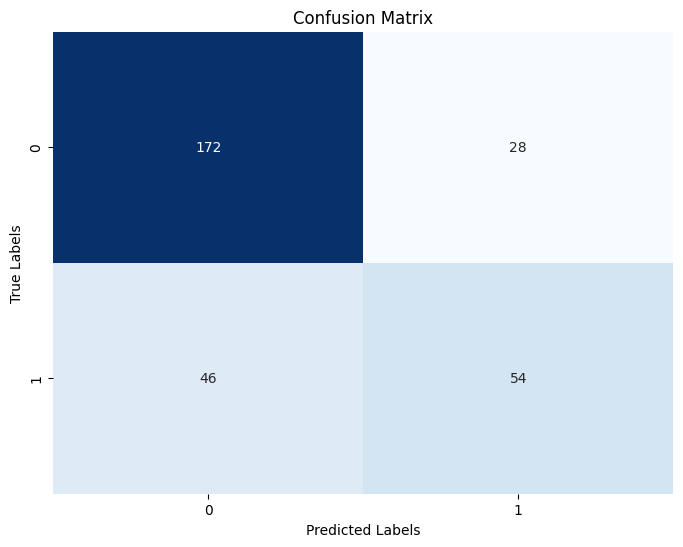

In [ ]:
knn_cv(X, y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 225
Jumlah data test: 75


KNeighborsClassifier()

Class: A
Sensitivity: 0.9
Specificity: 0.52
Accuracy: 0.77
F1-score: 0.84

Class: E
Sensitivity: 0.52
Specificity: 0.9
Accuracy: 0.77
F1-score: 0.60


Average Sensitivity: 0.71
Average Specificity: 0.71
Average Accuracy: 0.77
Average F1-score: 0.72
              precision    recall  f1-score   support

           A       0.79      0.90      0.84        50
           E       0.72      0.52      0.60        25

    accuracy                           0.77        75
   macro avg       0.76      0.71      0.72        75
weighted avg       0.77      0.77      0.76        75



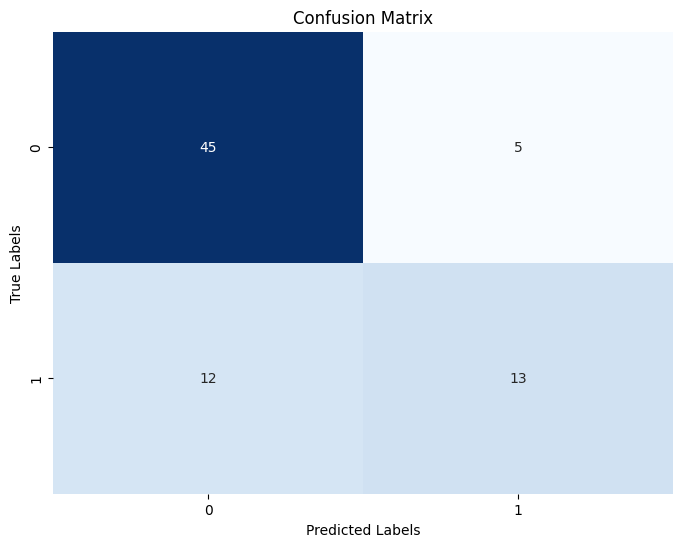

In [ ]:
knn_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


KNeighborsClassifier()

Class: A
Sensitivity: 0.8679245283018868
Specificity: 0.5454545454545454
Accuracy: 0.77
F1-score: 0.84

Class: E
Sensitivity: 0.5454545454545454
Specificity: 0.8679245283018868
Accuracy: 0.77
F1-score: 0.59


Average Sensitivity: 0.71
Average Specificity: 0.71
Average Accuracy: 0.77
Average F1-score: 0.71
              precision    recall  f1-score   support

           A       0.82      0.87      0.84        53
           E       0.63      0.55      0.59        22

    accuracy                           0.77        75
   macro avg       0.73      0.71      0.71        75
weighted avg       0.77      0.77      0.77        75



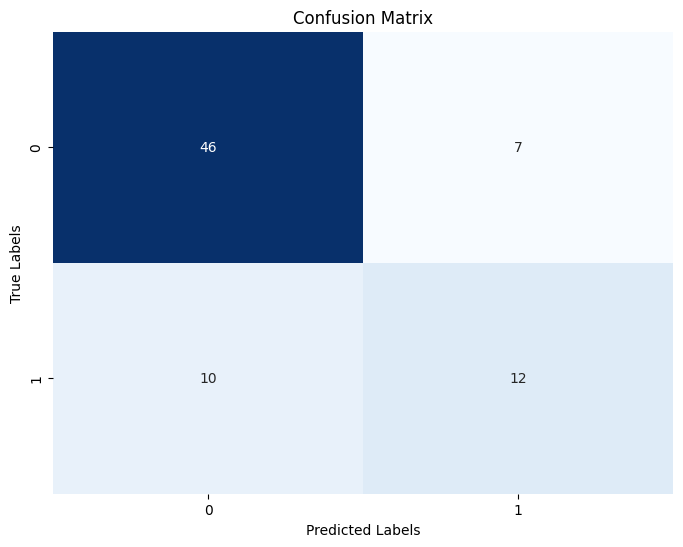

In [ ]:
knn_train_validation_test(model, X_test, y_test)

# **CPB 1**

In [ ]:
cpb1 = pd.read_excel('/content/drive/MyDrive/SLO/cpb/CPB1.xlsx')

In [ ]:
print(cpb1.columns.tolist())
print(f"Jumlah kelas: {cpb1['kelas'].nunique()}\n")
print("Jumlah data per kelas:")
display(cpb1['kelas'].value_counts())


['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5', 'kelas']
Jumlah kelas: 2

Jumlah data per kelas:


kelas
A    100
C    100
Name: count, dtype: int64

In [ ]:
X = cpb1[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb1['kelas']

## SVM

### 10Fold CV

Class: A
Sensitivity: 0.81
Specificity: 0.93
Accuracy: 0.87
F1-score: 0.86

Class: C
Sensitivity: 0.93
Specificity: 0.81
Accuracy: 0.87
F1-score: 0.88


Average Sensitivity: 0.87
Average Specificity: 0.87
Average Accuracy: 0.87
Average F1-score: 0.87
              precision    recall  f1-score   support

           A       0.92      0.81      0.86       100
           C       0.83      0.93      0.88       100

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



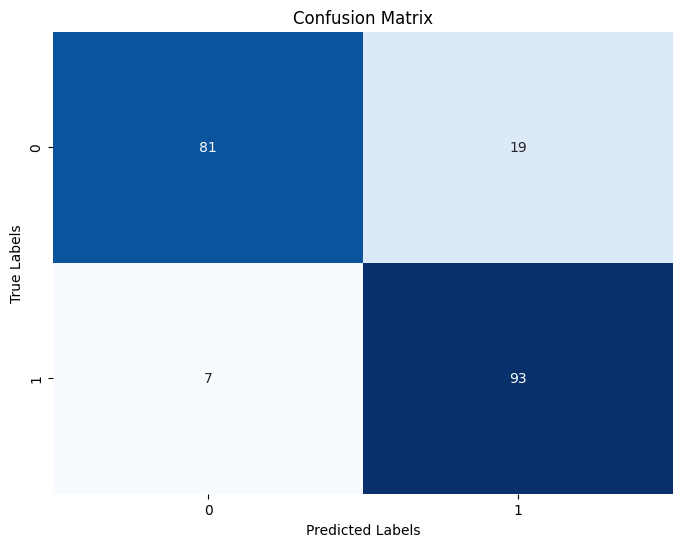

In [ ]:
svm_cv(X,y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 150
Jumlah data test: 50


Class: A
Sensitivity: 0.8148148148148148
Specificity: 0.9130434782608695
Accuracy: 0.86
F1-score: 0.86

Class: C
Sensitivity: 0.9130434782608695
Specificity: 0.8148148148148148
Accuracy: 0.86
F1-score: 0.86


Average Sensitivity: 0.86
Average Specificity: 0.86
Average Accuracy: 0.86
Average F1-score: 0.86
              precision    recall  f1-score   support

           A       0.92      0.81      0.86        27
           C       0.81      0.91      0.86        23

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.87      0.86      0.86        50



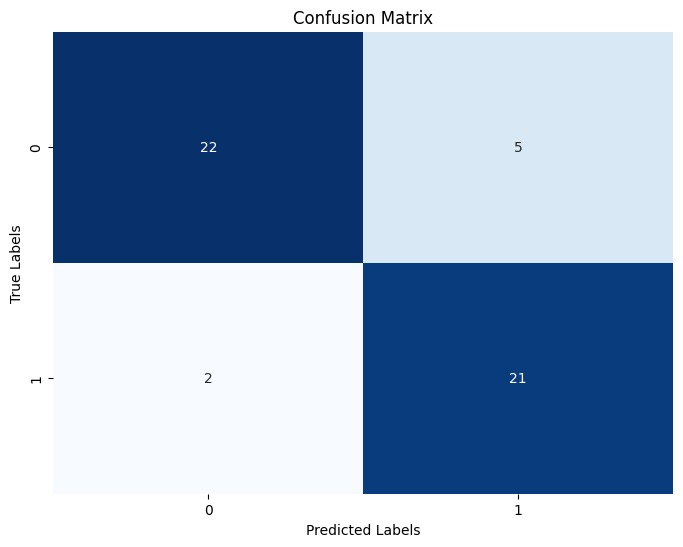

In [ ]:
svm_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


Class: A
Sensitivity: 0.7586206896551724
Specificity: 0.8571428571428571
Accuracy: 0.80
F1-score: 0.81

Class: C
Sensitivity: 0.8571428571428571
Specificity: 0.7586206896551724
Accuracy: 0.80
F1-score: 0.78


Average Sensitivity: 0.81
Average Specificity: 0.81
Average Accuracy: 0.80
Average F1-score: 0.80
              precision    recall  f1-score   support

           A       0.88      0.76      0.81        29
           C       0.72      0.86      0.78        21

    accuracy                           0.80        50
   macro avg       0.80      0.81      0.80        50
weighted avg       0.81      0.80      0.80        50



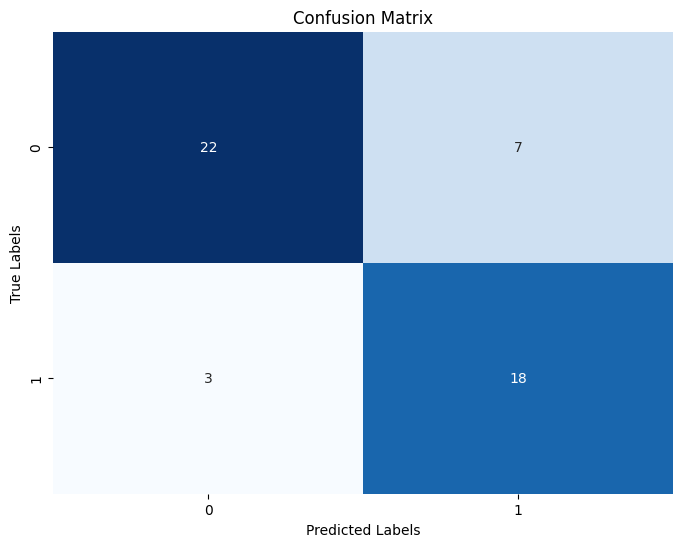

In [ ]:
svm_train_validation_test(model, X_test, y_test)

## KNN

### 10Fold CV

Class: A
Sensitivity: 0.88
Specificity: 0.88
Accuracy: 0.88
F1-score: 0.88

Class: C
Sensitivity: 0.88
Specificity: 0.88
Accuracy: 0.88
F1-score: 0.88


Average Sensitivity: 0.88
Average Specificity: 0.88
Average Accuracy: 0.88
Average F1-score: 0.88
              precision    recall  f1-score   support

           A       0.88      0.88      0.88       100
           C       0.88      0.88      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



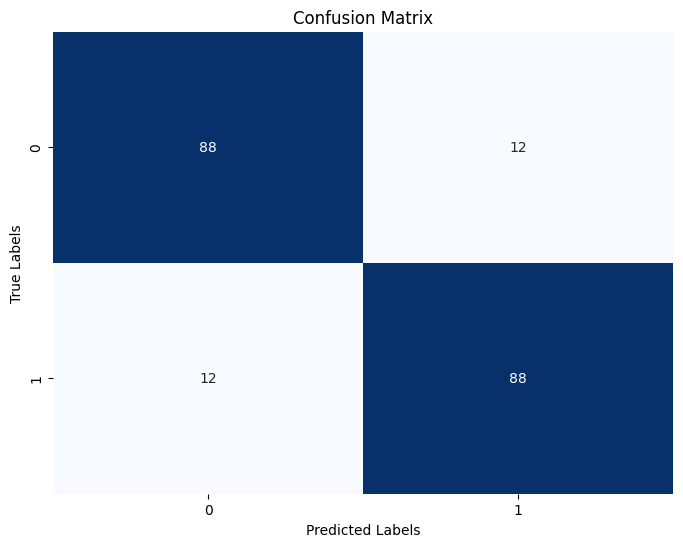

In [ ]:
knn_cv(X, y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 150
Jumlah data test: 50


KNeighborsClassifier()

Class: A
Sensitivity: 0.8888888888888888
Specificity: 0.8695652173913043
Accuracy: 0.88
F1-score: 0.89

Class: C
Sensitivity: 0.8695652173913043
Specificity: 0.8888888888888888
Accuracy: 0.88
F1-score: 0.87


Average Sensitivity: 0.88
Average Specificity: 0.88
Average Accuracy: 0.88
Average F1-score: 0.88
              precision    recall  f1-score   support

           A       0.89      0.89      0.89        27
           C       0.87      0.87      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



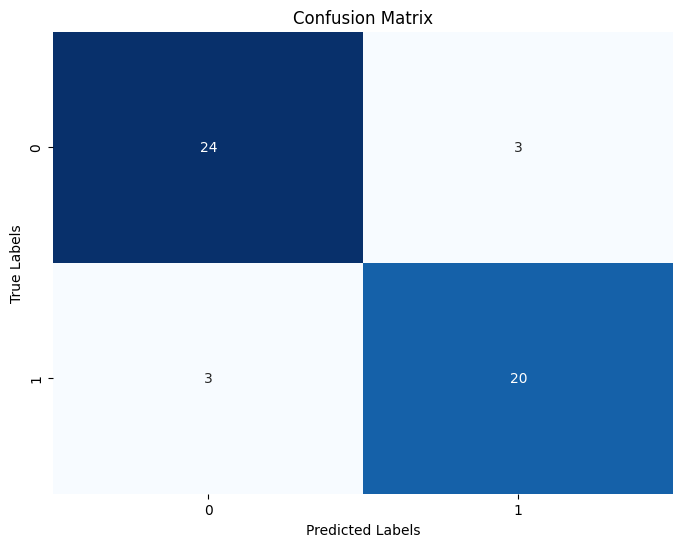

In [ ]:
knn_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


KNeighborsClassifier()

Class: A
Sensitivity: 0.7586206896551724
Specificity: 0.8571428571428571
Accuracy: 0.80
F1-score: 0.81

Class: C
Sensitivity: 0.8571428571428571
Specificity: 0.7586206896551724
Accuracy: 0.80
F1-score: 0.78


Average Sensitivity: 0.81
Average Specificity: 0.81
Average Accuracy: 0.80
Average F1-score: 0.80
              precision    recall  f1-score   support

           A       0.88      0.76      0.81        29
           C       0.72      0.86      0.78        21

    accuracy                           0.80        50
   macro avg       0.80      0.81      0.80        50
weighted avg       0.81      0.80      0.80        50



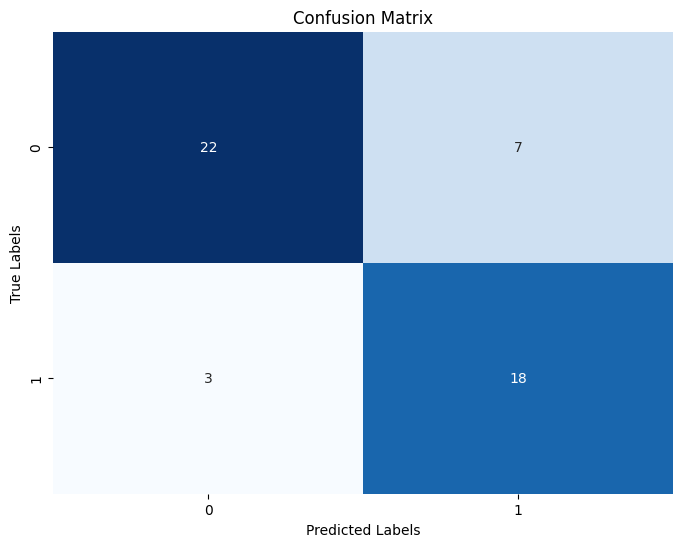

In [ ]:
knn_train_validation_test(model, X_test, y_test)

# **CPB 2**

In [ ]:
cpb2 = pd.read_excel('/content/drive/MyDrive/SLO/cpb/CPB2.xlsx')

In [ ]:
print(cpb2.columns.tolist())
print(f"Jumlah kelas: {cpb2['kelas'].nunique()}\n")
print("Jumlah data per kelas:")
display(cpb2['kelas'].value_counts())


['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5', 'kelas']
Jumlah kelas: 2

Jumlah data per kelas:


kelas
A    100
D    100
Name: count, dtype: int64

In [ ]:
X = cpb2[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb2['kelas']

## SVM

### 10Fold CV

Class: A
Sensitivity: 0.81
Specificity: 0.92
Accuracy: 0.86
F1-score: 0.86

Class: D
Sensitivity: 0.92
Specificity: 0.81
Accuracy: 0.86
F1-score: 0.87


Average Sensitivity: 0.86
Average Specificity: 0.86
Average Accuracy: 0.86
Average F1-score: 0.86
              precision    recall  f1-score   support

           A       0.91      0.81      0.86       100
           D       0.83      0.92      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



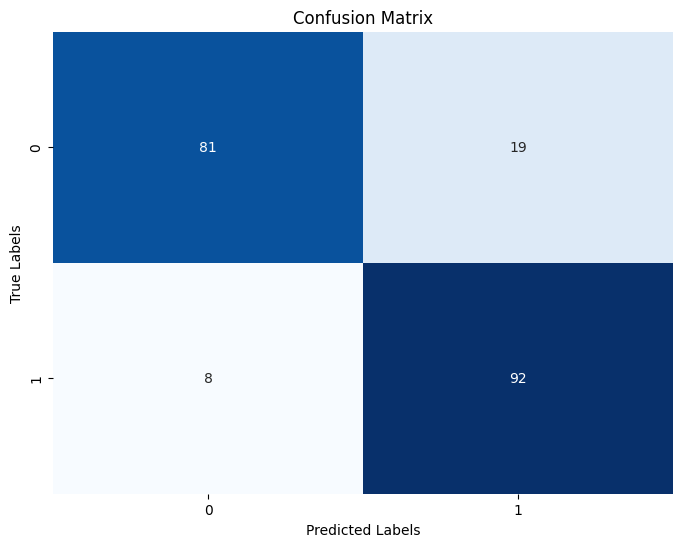

In [ ]:
svm_cv(X,y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 150
Jumlah data test: 50


Class: A
Sensitivity: 0.7777777777777778
Specificity: 0.9130434782608695
Accuracy: 0.84
F1-score: 0.84

Class: D
Sensitivity: 0.9130434782608695
Specificity: 0.7777777777777778
Accuracy: 0.84
F1-score: 0.84


Average Sensitivity: 0.85
Average Specificity: 0.85
Average Accuracy: 0.84
Average F1-score: 0.84
              precision    recall  f1-score   support

           A       0.91      0.78      0.84        27
           D       0.78      0.91      0.84        23

    accuracy                           0.84        50
   macro avg       0.85      0.85      0.84        50
weighted avg       0.85      0.84      0.84        50



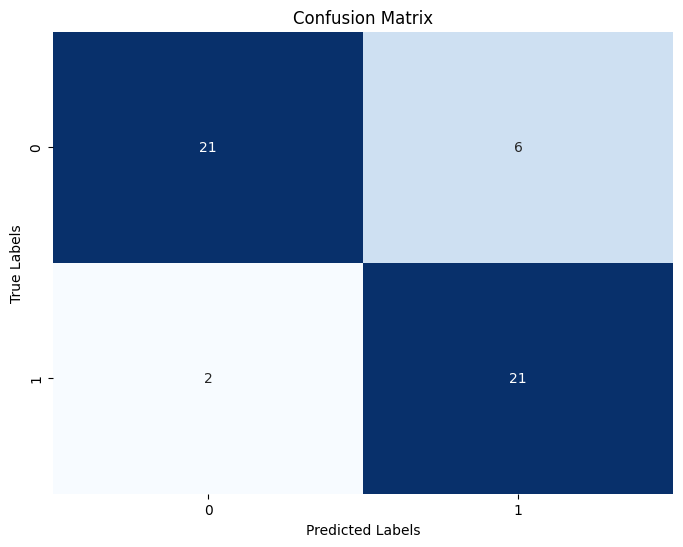

In [ ]:
svm_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


Class: A
Sensitivity: 0.7241379310344828
Specificity: 0.9047619047619048
Accuracy: 0.80
F1-score: 0.81

Class: D
Sensitivity: 0.9047619047619048
Specificity: 0.7241379310344828
Accuracy: 0.80
F1-score: 0.79


Average Sensitivity: 0.81
Average Specificity: 0.81
Average Accuracy: 0.80
Average F1-score: 0.80
              precision    recall  f1-score   support

           A       0.91      0.72      0.81        29
           D       0.70      0.90      0.79        21

    accuracy                           0.80        50
   macro avg       0.81      0.81      0.80        50
weighted avg       0.83      0.80      0.80        50



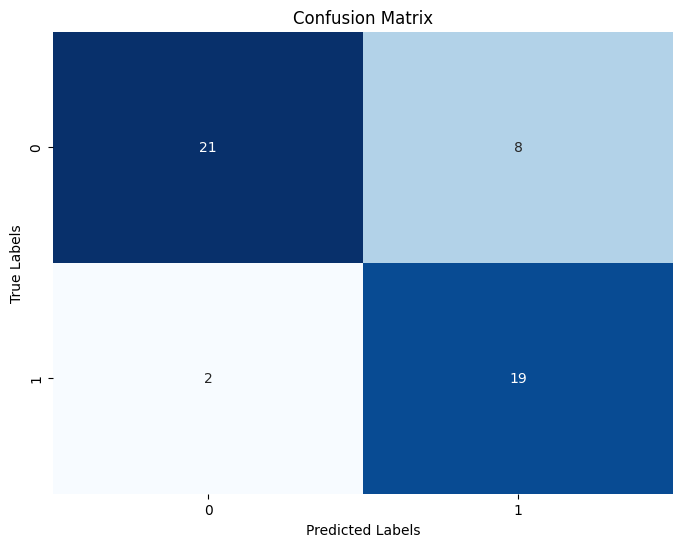

In [ ]:
svm_train_validation_test(model, X_test, y_test)

## KNN

### 10Fold CV

Class: A
Sensitivity: 0.8
Specificity: 0.89
Accuracy: 0.84
F1-score: 0.84

Class: D
Sensitivity: 0.89
Specificity: 0.8
Accuracy: 0.84
F1-score: 0.85


Average Sensitivity: 0.84
Average Specificity: 0.84
Average Accuracy: 0.84
Average F1-score: 0.84
              precision    recall  f1-score   support

           A       0.88      0.80      0.84       100
           D       0.82      0.89      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



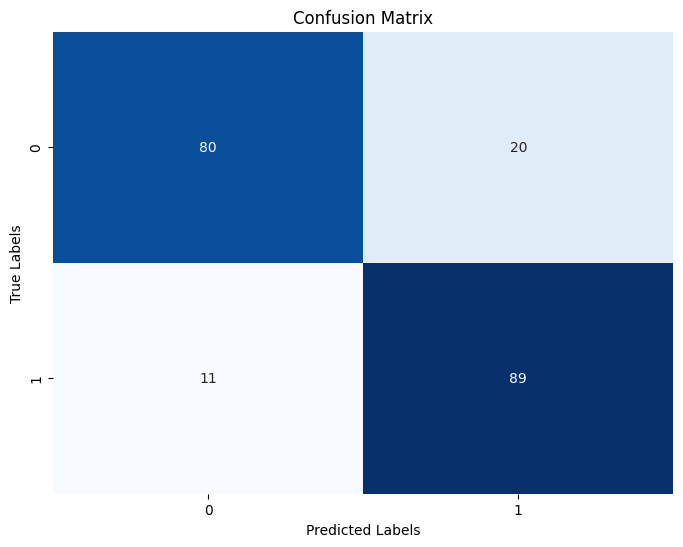

In [ ]:
knn_cv(X, y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 150
Jumlah data test: 50


KNeighborsClassifier()

Class: A
Sensitivity: 0.8518518518518519
Specificity: 0.9130434782608695
Accuracy: 0.88
F1-score: 0.88

Class: D
Sensitivity: 0.9130434782608695
Specificity: 0.8518518518518519
Accuracy: 0.88
F1-score: 0.87


Average Sensitivity: 0.88
Average Specificity: 0.88
Average Accuracy: 0.88
Average F1-score: 0.88
              precision    recall  f1-score   support

           A       0.92      0.85      0.88        27
           D       0.84      0.91      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



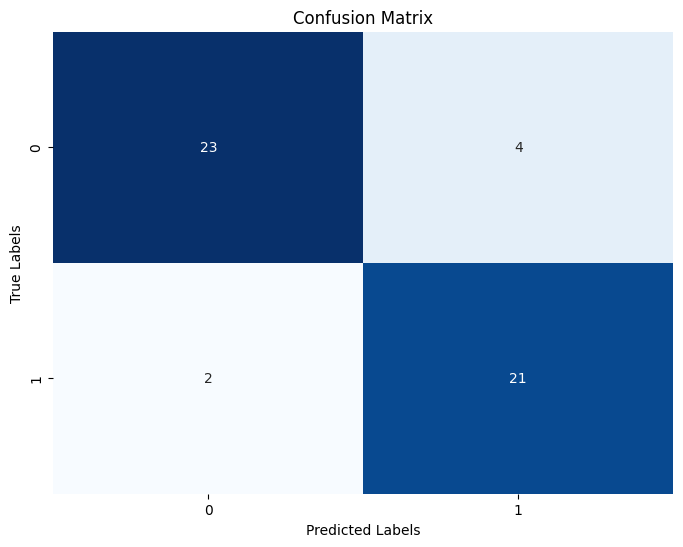

In [ ]:
knn_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


KNeighborsClassifier()

Class: A
Sensitivity: 0.6896551724137931
Specificity: 0.9523809523809523
Accuracy: 0.80
F1-score: 0.80

Class: D
Sensitivity: 0.9523809523809523
Specificity: 0.6896551724137931
Accuracy: 0.80
F1-score: 0.80


Average Sensitivity: 0.82
Average Specificity: 0.82
Average Accuracy: 0.80
Average F1-score: 0.80
              precision    recall  f1-score   support

           A       0.95      0.69      0.80        29
           D       0.69      0.95      0.80        21

    accuracy                           0.80        50
   macro avg       0.82      0.82      0.80        50
weighted avg       0.84      0.80      0.80        50



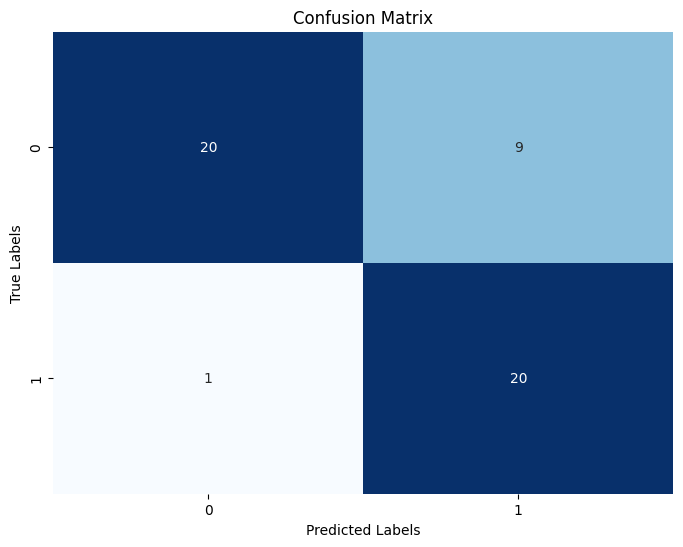

In [ ]:
knn_train_validation_test(model, X_test, y_test)

# **CPB 3**

In [ ]:
cpb3 = pd.read_excel('/content/drive/MyDrive/SLO/cpb/CPB3.xlsx')

In [ ]:
print(cpb3.columns.tolist())
print(f"Jumlah kelas: {cpb3['kelas'].nunique()}\n")
print("Jumlah data per kelas:")
display(cpb3['kelas'].value_counts())


['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5', 'kelas']
Jumlah kelas: 2

Jumlah data per kelas:


kelas
B    100
C    100
Name: count, dtype: int64

In [ ]:
X = cpb3[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb3['kelas']

## SVM

### 10Fold CV

Class: B
Sensitivity: 0.84
Specificity: 0.98
Accuracy: 0.91
F1-score: 0.90

Class: C
Sensitivity: 0.98
Specificity: 0.84
Accuracy: 0.91
F1-score: 0.92


Average Sensitivity: 0.91
Average Specificity: 0.91
Average Accuracy: 0.91
Average F1-score: 0.91
              precision    recall  f1-score   support

           B       0.98      0.84      0.90       100
           C       0.86      0.98      0.92       100

    accuracy                           0.91       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.91      0.91       200



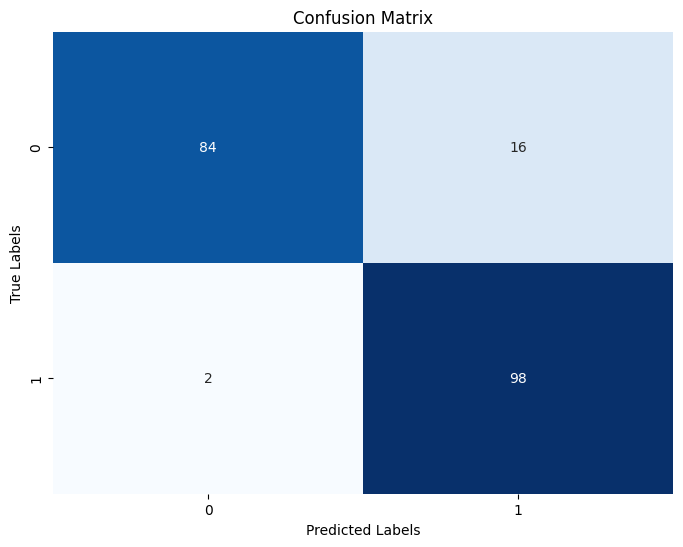

In [ ]:
svm_cv(X,y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 150
Jumlah data test: 50


Class: B
Sensitivity: 0.8888888888888888
Specificity: 1.0
Accuracy: 0.94
F1-score: 0.94

Class: C
Sensitivity: 1.0
Specificity: 0.8888888888888888
Accuracy: 0.94
F1-score: 0.94


Average Sensitivity: 0.94
Average Specificity: 0.94
Average Accuracy: 0.94
Average F1-score: 0.94
              precision    recall  f1-score   support

           B       1.00      0.89      0.94        27
           C       0.88      1.00      0.94        23

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



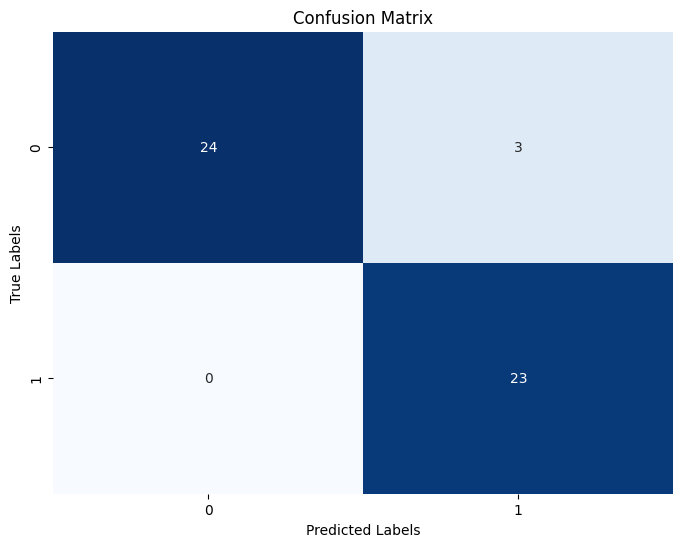

In [ ]:
svm_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


Class: B
Sensitivity: 0.8275862068965517
Specificity: 1.0
Accuracy: 0.90
F1-score: 0.91

Class: C
Sensitivity: 1.0
Specificity: 0.8275862068965517
Accuracy: 0.90
F1-score: 0.89


Average Sensitivity: 0.91
Average Specificity: 0.91
Average Accuracy: 0.90
Average F1-score: 0.90
              precision    recall  f1-score   support

           B       1.00      0.83      0.91        29
           C       0.81      1.00      0.89        21

    accuracy                           0.90        50
   macro avg       0.90      0.91      0.90        50
weighted avg       0.92      0.90      0.90        50



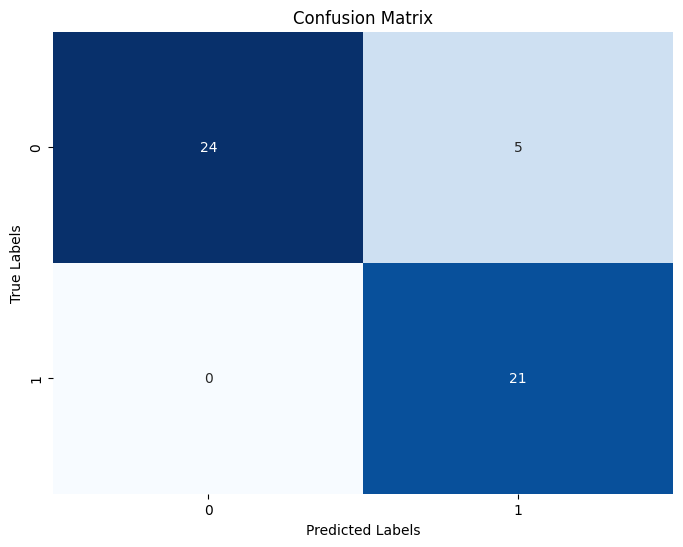

In [ ]:
svm_train_validation_test(model, X_test, y_test)

## KNN

### 10Fold CV

Class: B
Sensitivity: 0.84
Specificity: 0.89
Accuracy: 0.86
F1-score: 0.86

Class: C
Sensitivity: 0.89
Specificity: 0.84
Accuracy: 0.86
F1-score: 0.87


Average Sensitivity: 0.86
Average Specificity: 0.86
Average Accuracy: 0.86
Average F1-score: 0.86
              precision    recall  f1-score   support

           B       0.88      0.84      0.86       100
           C       0.85      0.89      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



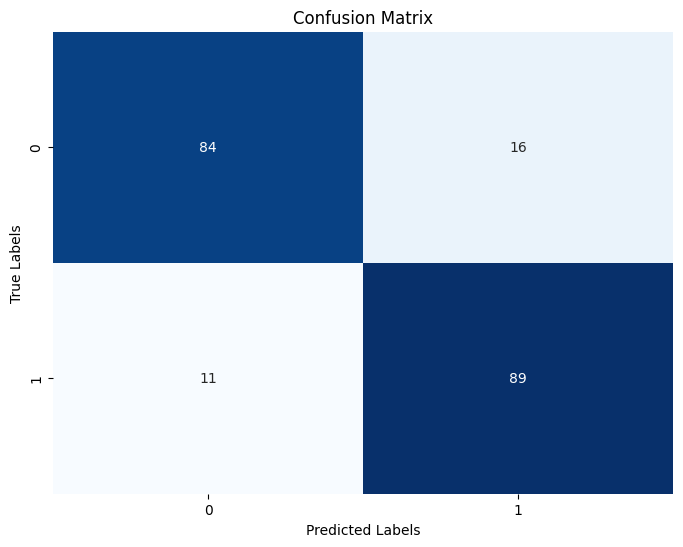

In [ ]:
knn_cv(X, y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 150
Jumlah data test: 50


KNeighborsClassifier()

Class: B
Sensitivity: 0.8888888888888888
Specificity: 0.8695652173913043
Accuracy: 0.88
F1-score: 0.89

Class: C
Sensitivity: 0.8695652173913043
Specificity: 0.8888888888888888
Accuracy: 0.88
F1-score: 0.87


Average Sensitivity: 0.88
Average Specificity: 0.88
Average Accuracy: 0.88
Average F1-score: 0.88
              precision    recall  f1-score   support

           B       0.89      0.89      0.89        27
           C       0.87      0.87      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



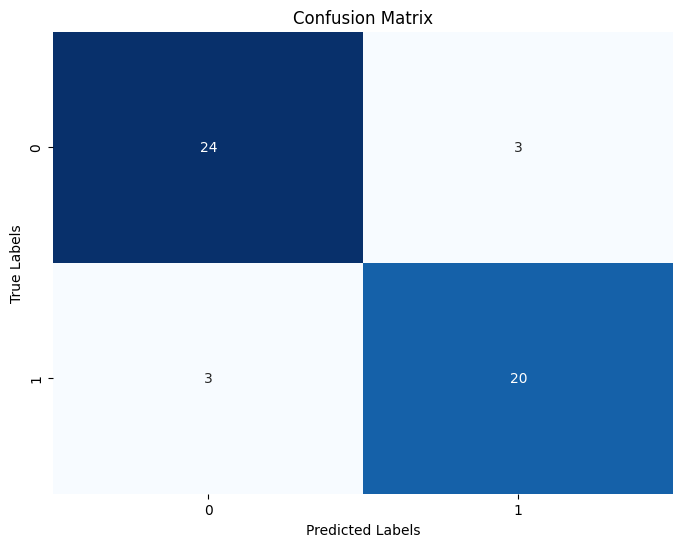

In [ ]:
knn_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


KNeighborsClassifier()

Class: B
Sensitivity: 0.8620689655172413
Specificity: 0.8571428571428571
Accuracy: 0.86
F1-score: 0.88

Class: C
Sensitivity: 0.8571428571428571
Specificity: 0.8620689655172413
Accuracy: 0.86
F1-score: 0.84


Average Sensitivity: 0.86
Average Specificity: 0.86
Average Accuracy: 0.86
Average F1-score: 0.86
              precision    recall  f1-score   support

           B       0.89      0.86      0.88        29
           C       0.82      0.86      0.84        21

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



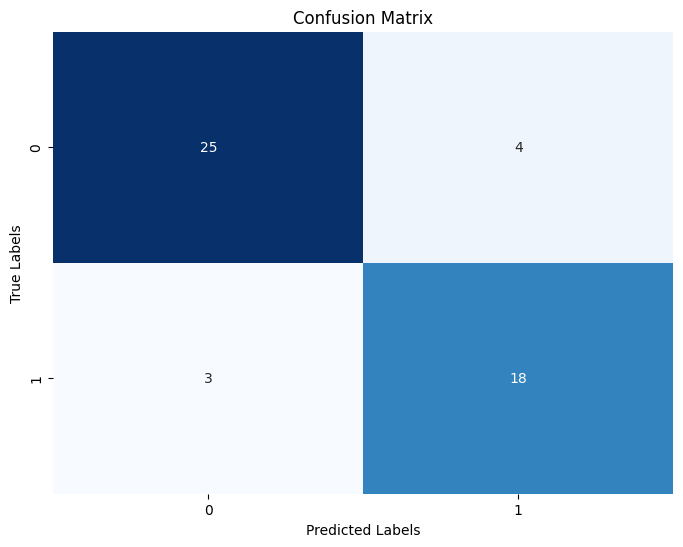

In [ ]:
knn_train_validation_test(model, X_test, y_test)

# **CPB 4**

In [ ]:
cpb4 = pd.read_excel('/content/drive/MyDrive/SLO/cpb/CPB4.xlsx')

In [ ]:
print(cpb4.columns.tolist())
print(f"Jumlah kelas: {cpb4['kelas'].nunique()}\n")
print("Jumlah data per kelas:")
display(cpb4['kelas'].value_counts())


['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5', 'kelas']
Jumlah kelas: 2

Jumlah data per kelas:


kelas
B    100
D    100
Name: count, dtype: int64

In [ ]:
X = cpb4[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb4['kelas']

## SVM

### 10Fold CV

Class: B
Sensitivity: 0.84
Specificity: 0.95
Accuracy: 0.90
F1-score: 0.89

Class: D
Sensitivity: 0.95
Specificity: 0.84
Accuracy: 0.90
F1-score: 0.90


Average Sensitivity: 0.90
Average Specificity: 0.90
Average Accuracy: 0.90
Average F1-score: 0.89
              precision    recall  f1-score   support

           B       0.94      0.84      0.89       100
           D       0.86      0.95      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



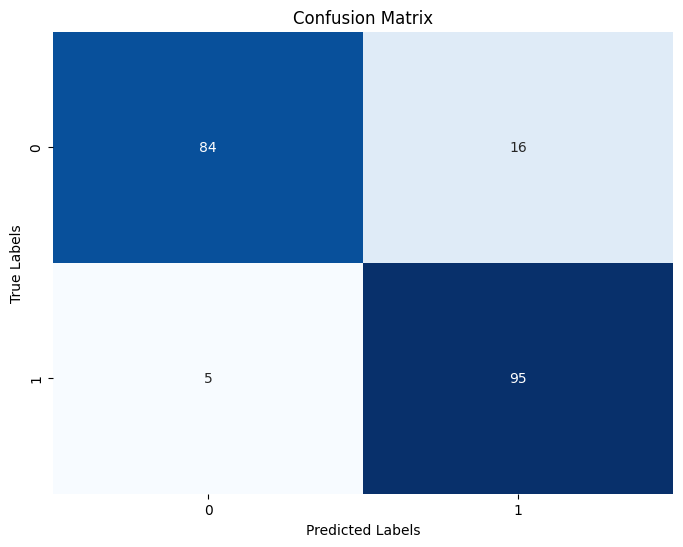

In [ ]:
svm_cv(X,y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 150
Jumlah data test: 50


Class: B
Sensitivity: 0.8888888888888888
Specificity: 0.9130434782608695
Accuracy: 0.90
F1-score: 0.91

Class: D
Sensitivity: 0.9130434782608695
Specificity: 0.8888888888888888
Accuracy: 0.90
F1-score: 0.89


Average Sensitivity: 0.90
Average Specificity: 0.90
Average Accuracy: 0.90
Average F1-score: 0.90
              precision    recall  f1-score   support

           B       0.92      0.89      0.91        27
           D       0.88      0.91      0.89        23

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



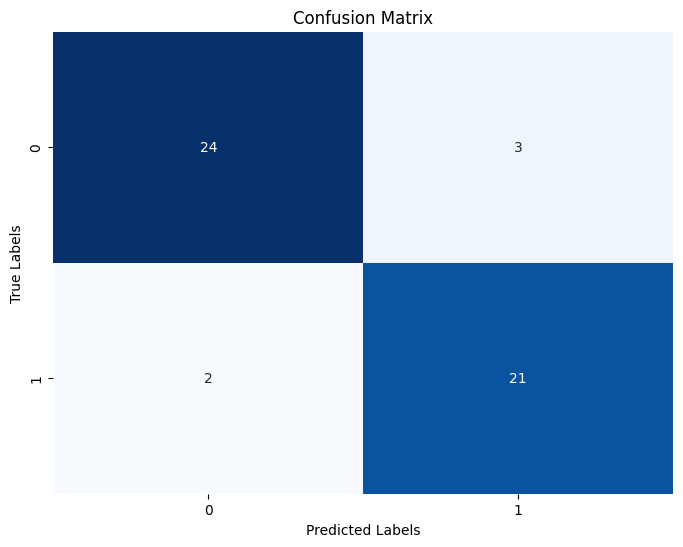

In [ ]:
svm_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


Class: B
Sensitivity: 0.8275862068965517
Specificity: 0.9523809523809523
Accuracy: 0.88
F1-score: 0.89

Class: D
Sensitivity: 0.9523809523809523
Specificity: 0.8275862068965517
Accuracy: 0.88
F1-score: 0.87


Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.88
Average F1-score: 0.88
              precision    recall  f1-score   support

           B       0.96      0.83      0.89        29
           D       0.80      0.95      0.87        21

    accuracy                           0.88        50
   macro avg       0.88      0.89      0.88        50
weighted avg       0.89      0.88      0.88        50



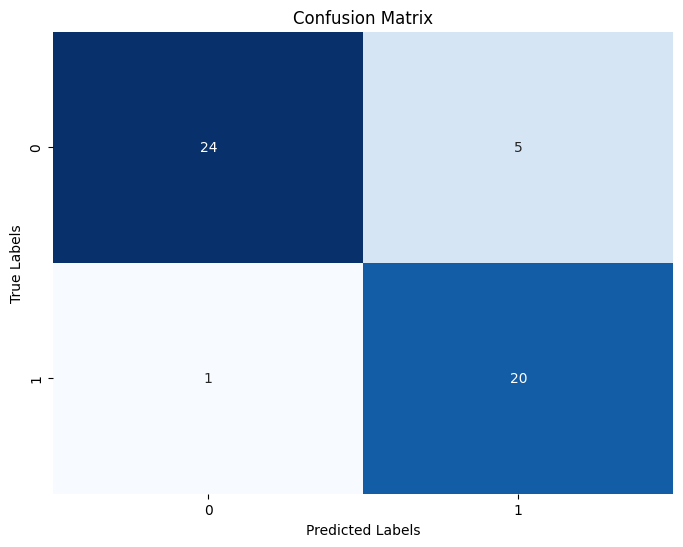

In [ ]:
svm_train_validation_test(model, X_test, y_test)

## KNN

### 10Fold CV

Class: B
Sensitivity: 0.83
Specificity: 0.96
Accuracy: 0.90
F1-score: 0.89

Class: D
Sensitivity: 0.96
Specificity: 0.83
Accuracy: 0.90
F1-score: 0.90


Average Sensitivity: 0.90
Average Specificity: 0.90
Average Accuracy: 0.90
Average F1-score: 0.89
              precision    recall  f1-score   support

           B       0.95      0.83      0.89       100
           D       0.85      0.96      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



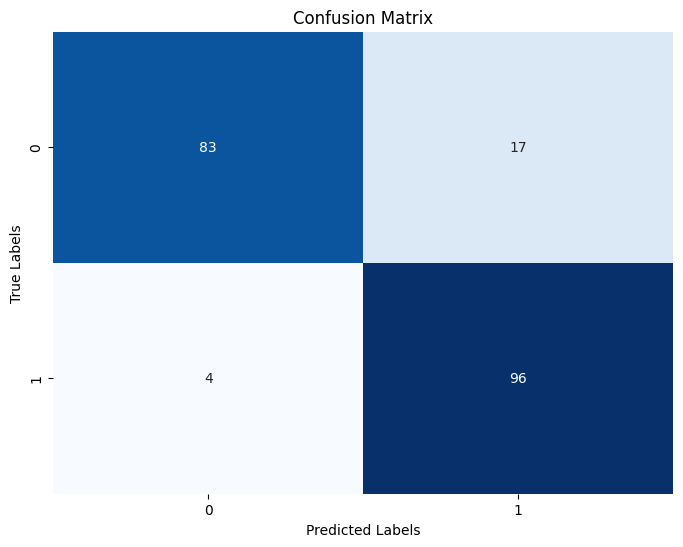

In [ ]:
knn_cv(X, y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 150
Jumlah data test: 50


KNeighborsClassifier()

Class: B
Sensitivity: 0.8888888888888888
Specificity: 0.8695652173913043
Accuracy: 0.88
F1-score: 0.89

Class: D
Sensitivity: 0.8695652173913043
Specificity: 0.8888888888888888
Accuracy: 0.88
F1-score: 0.87


Average Sensitivity: 0.88
Average Specificity: 0.88
Average Accuracy: 0.88
Average F1-score: 0.88
              precision    recall  f1-score   support

           B       0.89      0.89      0.89        27
           D       0.87      0.87      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



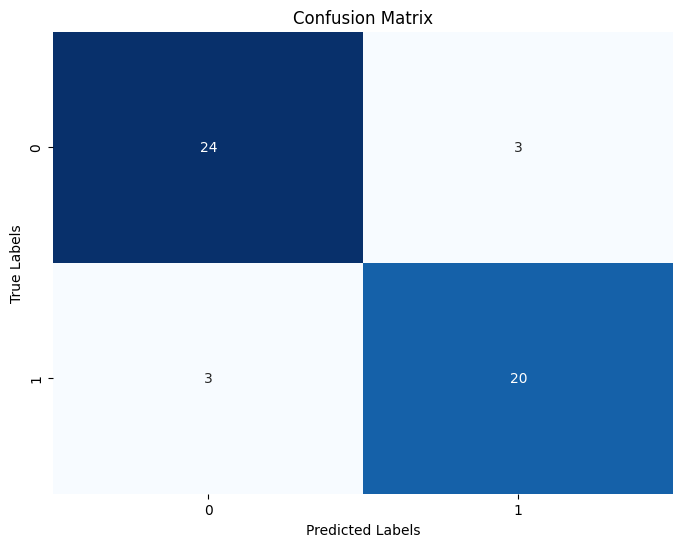

In [ ]:
knn_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


KNeighborsClassifier()

Class: B
Sensitivity: 0.8275862068965517
Specificity: 0.9523809523809523
Accuracy: 0.88
F1-score: 0.89

Class: D
Sensitivity: 0.9523809523809523
Specificity: 0.8275862068965517
Accuracy: 0.88
F1-score: 0.87


Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.88
Average F1-score: 0.88
              precision    recall  f1-score   support

           B       0.96      0.83      0.89        29
           D       0.80      0.95      0.87        21

    accuracy                           0.88        50
   macro avg       0.88      0.89      0.88        50
weighted avg       0.89      0.88      0.88        50



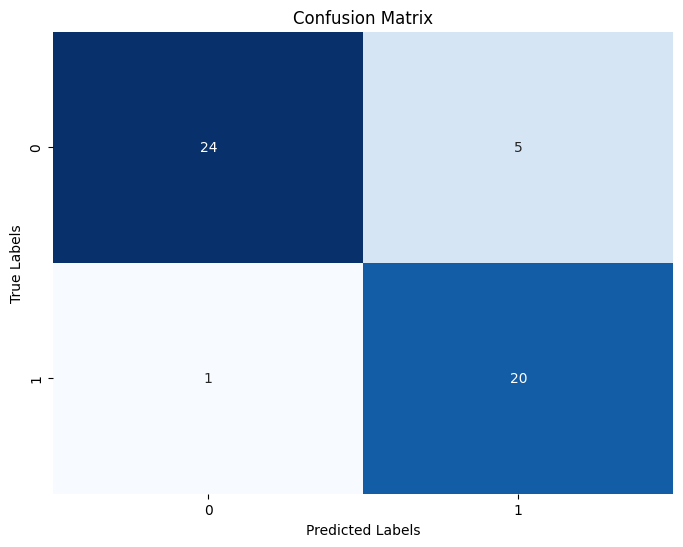

In [ ]:
knn_train_validation_test(model, X_test, y_test)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


KNeighborsClassifier()

Class: B
Sensitivity: 0.8275862068965517
Specificity: 0.9523809523809523
Accuracy: 0.88
F1-score: 0.89

Class: D
Sensitivity: 0.9523809523809523
Specificity: 0.8275862068965517
Accuracy: 0.88
F1-score: 0.87


Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.88
Average F1-score: 0.88
              precision    recall  f1-score   support

           B       0.96      0.83      0.89        29
           D       0.80      0.95      0.87        21

    accuracy                           0.88        50
   macro avg       0.88      0.89      0.88        50
weighted avg       0.89      0.88      0.88        50



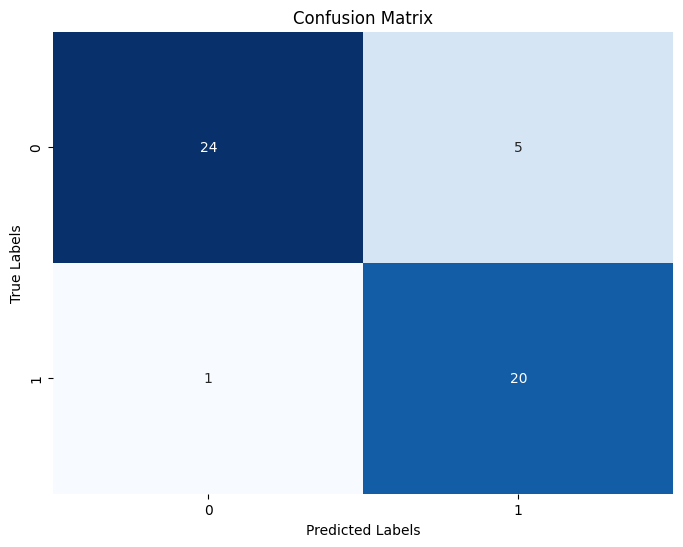

In [ ]:
knn_train_validation_test(model, X_test, y_test)

# **CPB 5**

In [ ]:
cpb5 = pd.read_excel('/content/drive/MyDrive/SLO/cpb/CPB5.xlsx')

In [ ]:
print(cpb5.columns.tolist())
print(f"Jumlah kelas: {cpb5['kelas'].nunique()}\n")
print("Jumlah data per kelas:")
display(cpb5['kelas'].value_counts())


['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5', 'kelas']
Jumlah kelas: 2

Jumlah data per kelas:


kelas
A    200
C    100
Name: count, dtype: int64

In [ ]:
X = cpb5[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb5['kelas']

## SVM

### 10Fold CV

Class: A
Sensitivity: 0.84
Specificity: 0.91
Accuracy: 0.86
F1-score: 0.89

Class: C
Sensitivity: 0.91
Specificity: 0.84
Accuracy: 0.86
F1-score: 0.82


Average Sensitivity: 0.88
Average Specificity: 0.88
Average Accuracy: 0.86
Average F1-score: 0.85
              precision    recall  f1-score   support

           A       0.95      0.84      0.89       200
           C       0.74      0.91      0.82       100

    accuracy                           0.86       300
   macro avg       0.84      0.88      0.85       300
weighted avg       0.88      0.86      0.87       300



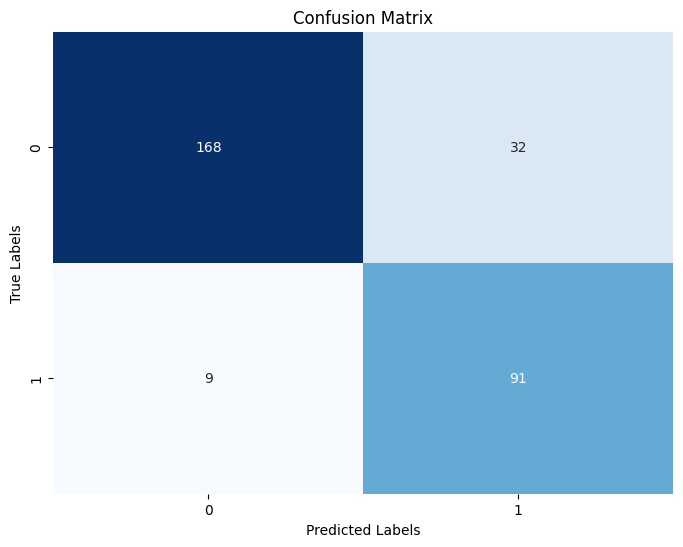

In [ ]:
svm_cv(X,y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 225
Jumlah data test: 75


Class: A
Sensitivity: 0.86
Specificity: 0.92
Accuracy: 0.88
F1-score: 0.91

Class: C
Sensitivity: 0.92
Specificity: 0.86
Accuracy: 0.88
F1-score: 0.84


Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.88
Average F1-score: 0.87
              precision    recall  f1-score   support

           A       0.96      0.86      0.91        50
           C       0.77      0.92      0.84        25

    accuracy                           0.88        75
   macro avg       0.86      0.89      0.87        75
weighted avg       0.89      0.88      0.88        75



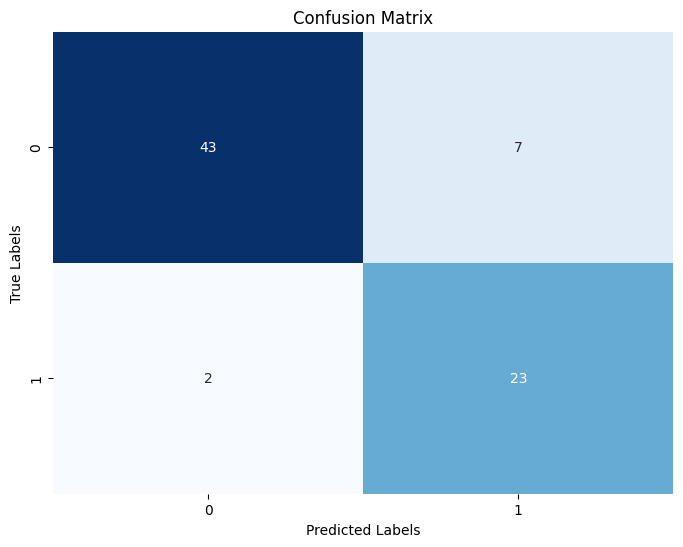

In [ ]:
svm_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: A
Sensitivity: 0.8679245283018868
Specificity: 0.9545454545454546
Accuracy: 0.89
F1-score: 0.92

Class: C
Sensitivity: 0.9545454545454546
Specificity: 0.8679245283018868
Accuracy: 0.89
F1-score: 0.84


Average Sensitivity: 0.91
Average Specificity: 0.91
Average Accuracy: 0.89
Average F1-score: 0.88
              precision    recall  f1-score   support

           A       0.98      0.87      0.92        53
           C       0.75      0.95      0.84        22

    accuracy                           0.89        75
   macro avg       0.86      0.91      0.88        75
weighted avg       0.91      0.89      0.90        75



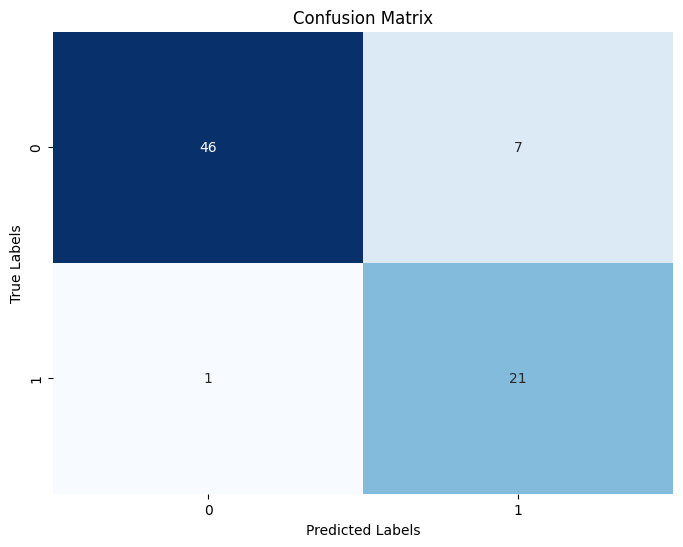

In [ ]:
svm_train_validation_test(model, X_test, y_test)

## KNN

### 10Fold CV

Class: A
Sensitivity: 0.89
Specificity: 0.81
Accuracy: 0.86
F1-score: 0.90

Class: C
Sensitivity: 0.81
Specificity: 0.89
Accuracy: 0.86
F1-score: 0.80


Average Sensitivity: 0.85
Average Specificity: 0.85
Average Accuracy: 0.86
Average F1-score: 0.85
              precision    recall  f1-score   support

           A       0.90      0.89      0.90       200
           C       0.79      0.81      0.80       100

    accuracy                           0.86       300
   macro avg       0.84      0.85      0.85       300
weighted avg       0.86      0.86      0.86       300



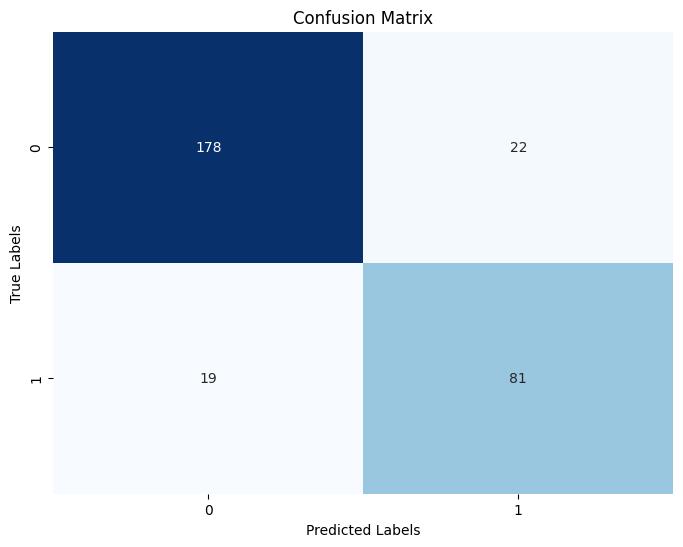

In [ ]:
knn_cv(X, y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 225
Jumlah data test: 75


KNeighborsClassifier()

Class: A
Sensitivity: 0.88
Specificity: 0.88
Accuracy: 0.88
F1-score: 0.91

Class: C
Sensitivity: 0.88
Specificity: 0.88
Accuracy: 0.88
F1-score: 0.83


Average Sensitivity: 0.88
Average Specificity: 0.88
Average Accuracy: 0.88
Average F1-score: 0.87
              precision    recall  f1-score   support

           A       0.94      0.88      0.91        50
           C       0.79      0.88      0.83        25

    accuracy                           0.88        75
   macro avg       0.86      0.88      0.87        75
weighted avg       0.89      0.88      0.88        75



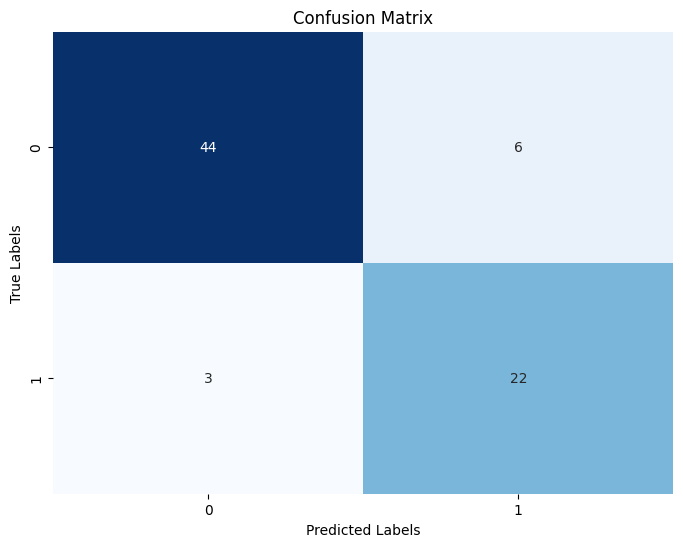

In [ ]:
knn_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


KNeighborsClassifier()

Class: A
Sensitivity: 0.8867924528301887
Specificity: 0.8636363636363636
Accuracy: 0.88
F1-score: 0.91

Class: C
Sensitivity: 0.8636363636363636
Specificity: 0.8867924528301887
Accuracy: 0.88
F1-score: 0.81


Average Sensitivity: 0.88
Average Specificity: 0.88
Average Accuracy: 0.88
Average F1-score: 0.86
              precision    recall  f1-score   support

           A       0.94      0.89      0.91        53
           C       0.76      0.86      0.81        22

    accuracy                           0.88        75
   macro avg       0.85      0.88      0.86        75
weighted avg       0.89      0.88      0.88        75



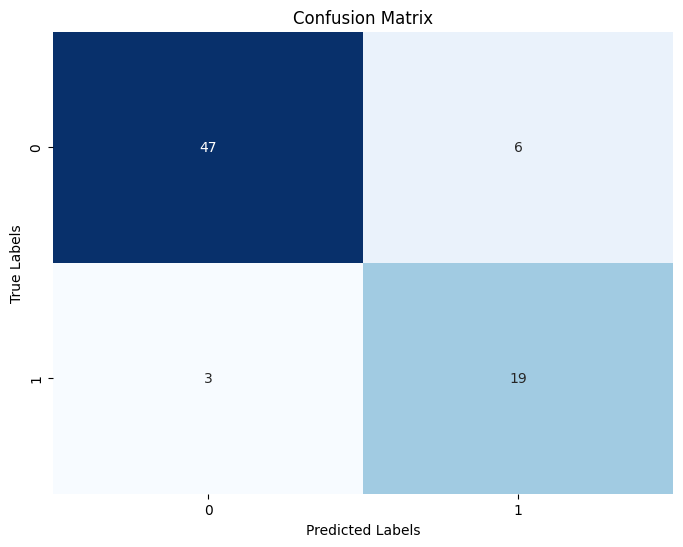

In [ ]:
knn_train_validation_test(model, X_test, y_test)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


KNeighborsClassifier()

Class: A
Sensitivity: 0.8867924528301887
Specificity: 0.8636363636363636
Accuracy: 0.88
F1-score: 0.91

Class: C
Sensitivity: 0.8636363636363636
Specificity: 0.8867924528301887
Accuracy: 0.88
F1-score: 0.81


Average Sensitivity: 0.88
Average Specificity: 0.88
Average Accuracy: 0.88
Average F1-score: 0.86
              precision    recall  f1-score   support

           A       0.94      0.89      0.91        53
           C       0.76      0.86      0.81        22

    accuracy                           0.88        75
   macro avg       0.85      0.88      0.86        75
weighted avg       0.89      0.88      0.88        75



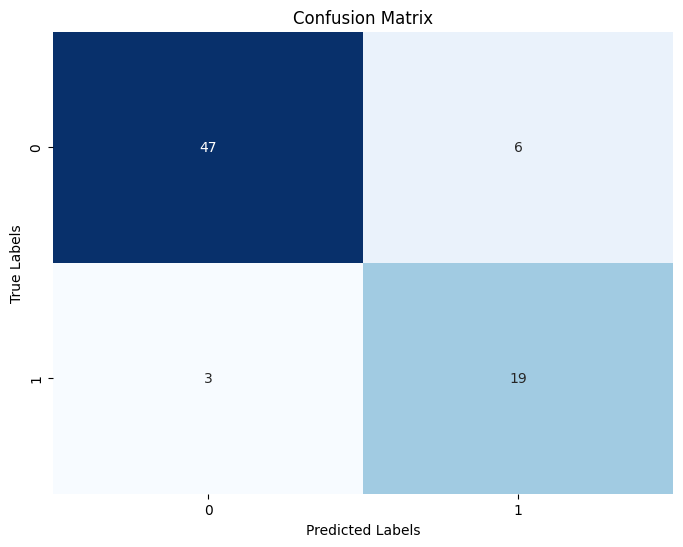

In [ ]:
knn_train_validation_test(model, X_test, y_test)

# **CPB 6**

In [ ]:
cpb6 = pd.read_excel('/content/drive/MyDrive/SLO/cpb/CPB6.xlsx')

In [ ]:
print(cpb6.columns.tolist())
print(f"Jumlah kelas: {cpb6['kelas'].nunique()}\n")
print("Jumlah data per kelas:")
display(cpb6['kelas'].value_counts())


['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5', 'kelas']
Jumlah kelas: 2

Jumlah data per kelas:


kelas
A    200
D    100
Name: count, dtype: int64

In [ ]:
X = cpb6[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb6['kelas']

## SVM

### 10Fold CV

Class: A
Sensitivity: 0.84
Specificity: 0.87
Accuracy: 0.85
F1-score: 0.88

Class: D
Sensitivity: 0.87
Specificity: 0.84
Accuracy: 0.85
F1-score: 0.79


Average Sensitivity: 0.85
Average Specificity: 0.85
Average Accuracy: 0.85
Average F1-score: 0.84
              precision    recall  f1-score   support

           A       0.93      0.84      0.88       200
           D       0.73      0.87      0.79       100

    accuracy                           0.85       300
   macro avg       0.83      0.85      0.84       300
weighted avg       0.86      0.85      0.85       300



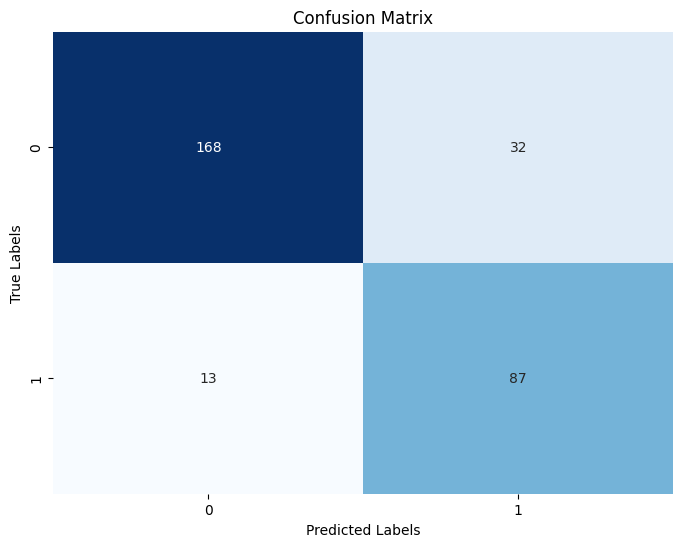

In [ ]:
svm_cv(X,y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 225
Jumlah data test: 75


Class: A
Sensitivity: 0.86
Specificity: 0.96
Accuracy: 0.89
F1-score: 0.91

Class: D
Sensitivity: 0.96
Specificity: 0.86
Accuracy: 0.89
F1-score: 0.86


Average Sensitivity: 0.91
Average Specificity: 0.91
Average Accuracy: 0.89
Average F1-score: 0.89
              precision    recall  f1-score   support

           A       0.98      0.86      0.91        50
           D       0.77      0.96      0.86        25

    accuracy                           0.89        75
   macro avg       0.88      0.91      0.89        75
weighted avg       0.91      0.89      0.90        75



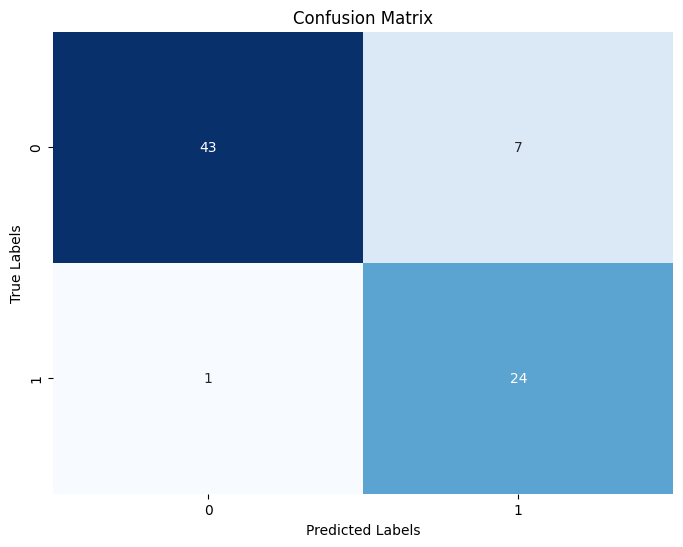

In [ ]:
svm_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: A
Sensitivity: 0.8867924528301887
Specificity: 1.0
Accuracy: 0.92
F1-score: 0.94

Class: D
Sensitivity: 1.0
Specificity: 0.8867924528301887
Accuracy: 0.92
F1-score: 0.88


Average Sensitivity: 0.94
Average Specificity: 0.94
Average Accuracy: 0.92
Average F1-score: 0.91
              precision    recall  f1-score   support

           A       1.00      0.89      0.94        53
           D       0.79      1.00      0.88        22

    accuracy                           0.92        75
   macro avg       0.89      0.94      0.91        75
weighted avg       0.94      0.92      0.92        75



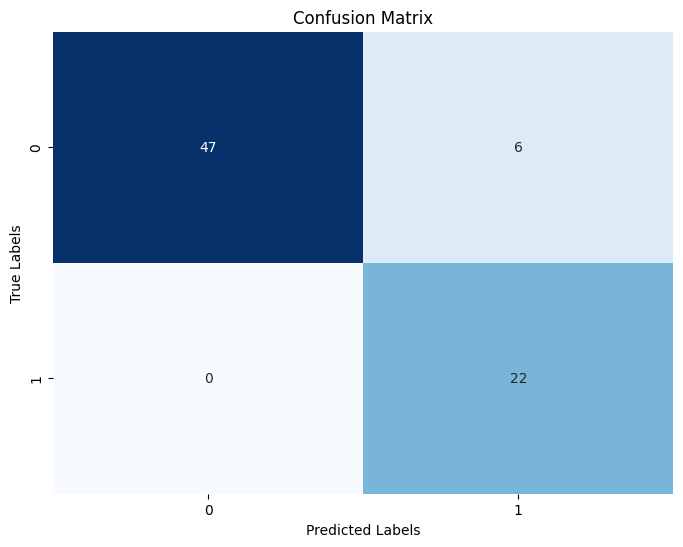

In [ ]:
svm_train_validation_test(model, X_test, y_test)

## KNN

### 10Fold CV

Class: A
Sensitivity: 0.855
Specificity: 0.83
Accuracy: 0.85
F1-score: 0.88

Class: D
Sensitivity: 0.83
Specificity: 0.855
Accuracy: 0.85
F1-score: 0.78


Average Sensitivity: 0.84
Average Specificity: 0.84
Average Accuracy: 0.85
Average F1-score: 0.83
              precision    recall  f1-score   support

           A       0.91      0.85      0.88       200
           D       0.74      0.83      0.78       100

    accuracy                           0.85       300
   macro avg       0.83      0.84      0.83       300
weighted avg       0.85      0.85      0.85       300



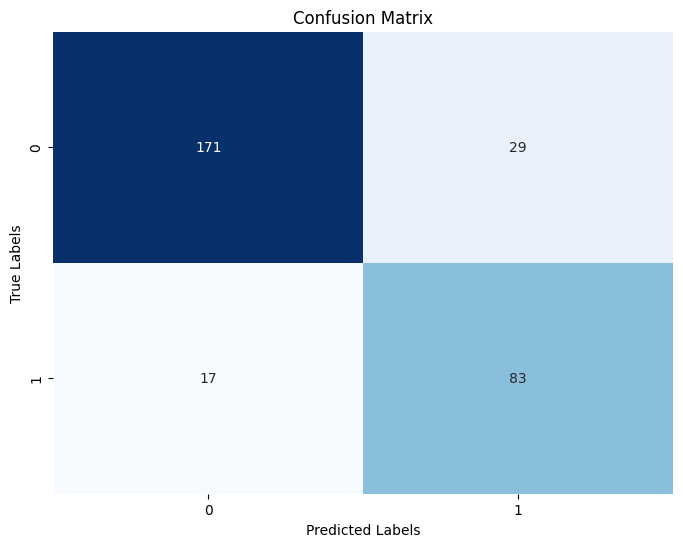

In [ ]:
knn_cv(X, y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 225
Jumlah data test: 75


KNeighborsClassifier()

Class: A
Sensitivity: 0.84
Specificity: 0.88
Accuracy: 0.85
F1-score: 0.88

Class: D
Sensitivity: 0.88
Specificity: 0.84
Accuracy: 0.85
F1-score: 0.80


Average Sensitivity: 0.86
Average Specificity: 0.86
Average Accuracy: 0.85
Average F1-score: 0.84
              precision    recall  f1-score   support

           A       0.93      0.84      0.88        50
           D       0.73      0.88      0.80        25

    accuracy                           0.85        75
   macro avg       0.83      0.86      0.84        75
weighted avg       0.87      0.85      0.86        75



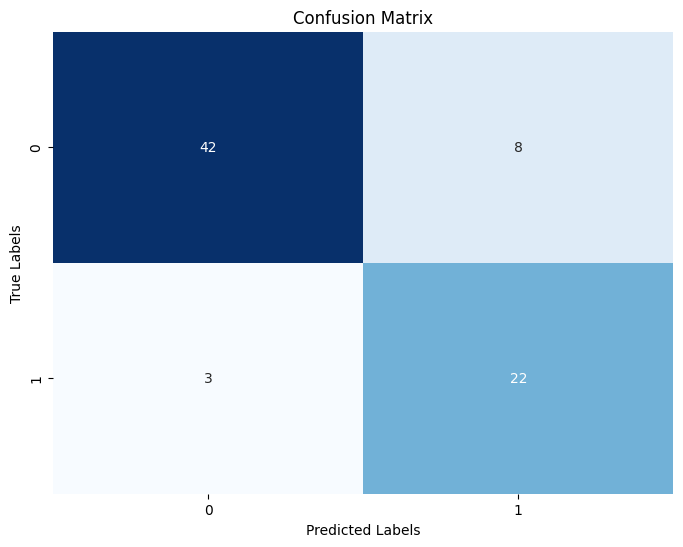

In [ ]:
knn_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


KNeighborsClassifier()

Class: A
Sensitivity: 0.8867924528301887
Specificity: 1.0
Accuracy: 0.92
F1-score: 0.94

Class: D
Sensitivity: 1.0
Specificity: 0.8867924528301887
Accuracy: 0.92
F1-score: 0.88


Average Sensitivity: 0.94
Average Specificity: 0.94
Average Accuracy: 0.92
Average F1-score: 0.91
              precision    recall  f1-score   support

           A       1.00      0.89      0.94        53
           D       0.79      1.00      0.88        22

    accuracy                           0.92        75
   macro avg       0.89      0.94      0.91        75
weighted avg       0.94      0.92      0.92        75



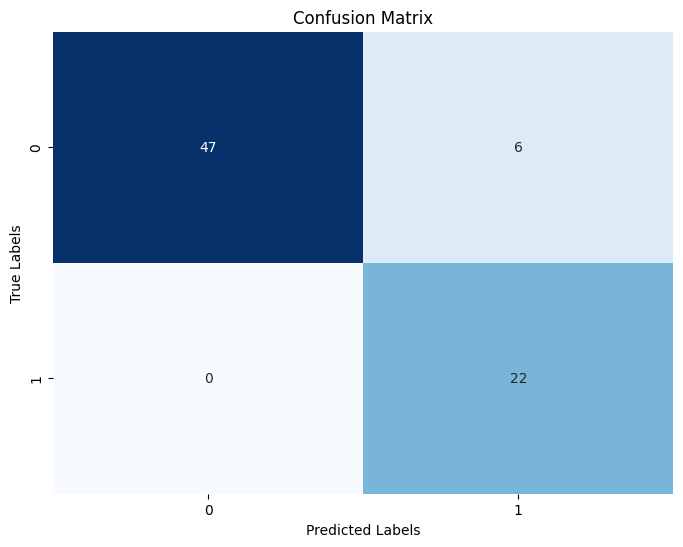

In [ ]:
knn_train_validation_test(model, X_test, y_test)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


KNeighborsClassifier()

Class: A
Sensitivity: 0.8867924528301887
Specificity: 1.0
Accuracy: 0.92
F1-score: 0.94

Class: D
Sensitivity: 1.0
Specificity: 0.8867924528301887
Accuracy: 0.92
F1-score: 0.88


Average Sensitivity: 0.94
Average Specificity: 0.94
Average Accuracy: 0.92
Average F1-score: 0.91
              precision    recall  f1-score   support

           A       1.00      0.89      0.94        53
           D       0.79      1.00      0.88        22

    accuracy                           0.92        75
   macro avg       0.89      0.94      0.91        75
weighted avg       0.94      0.92      0.92        75



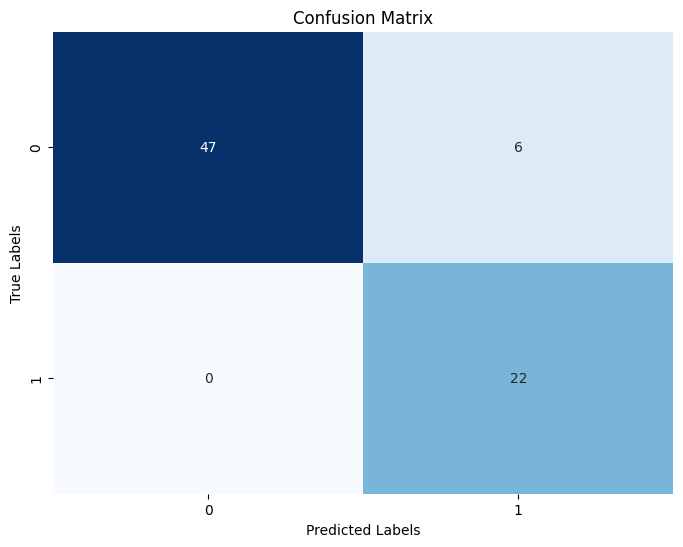

In [ ]:
knn_train_validation_test(model, X_test, y_test)

# **CPB 7**

In [ ]:
cpb7 = pd.read_excel('/content/drive/MyDrive/SLO/cpb/CPB7.xlsx')

In [ ]:
print(cpb7.columns.tolist())
print(f"Jumlah kelas: {cpb7['kelas'].nunique()}\n")
print("Jumlah data per kelas:")
display(cpb7['kelas'].value_counts())


['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5', 'kelas']
Jumlah kelas: 2

Jumlah data per kelas:


kelas
A    200
C    200
Name: count, dtype: int64

In [ ]:
X = cpb7[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb7['kelas']

## SVM

### 10Fold CV

Class: A
Sensitivity: 0.815
Specificity: 0.925
Accuracy: 0.87
F1-score: 0.86

Class: C
Sensitivity: 0.925
Specificity: 0.815
Accuracy: 0.87
F1-score: 0.88


Average Sensitivity: 0.87
Average Specificity: 0.87
Average Accuracy: 0.87
Average F1-score: 0.87
              precision    recall  f1-score   support

           A       0.92      0.81      0.86       200
           C       0.83      0.93      0.88       200

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



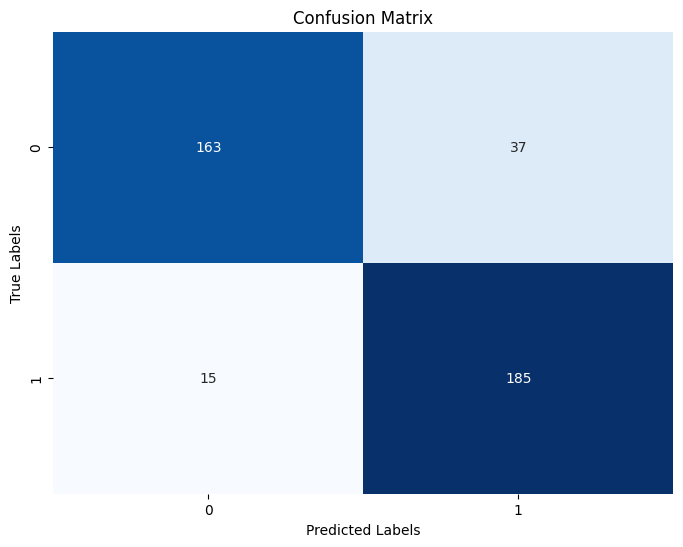

In [ ]:
svm_cv(X,y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 300
Jumlah data test: 100


Class: A
Sensitivity: 0.8269230769230769
Specificity: 0.9583333333333334
Accuracy: 0.89
F1-score: 0.89

Class: C
Sensitivity: 0.9583333333333334
Specificity: 0.8269230769230769
Accuracy: 0.89
F1-score: 0.89


Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.89
Average F1-score: 0.89
              precision    recall  f1-score   support

           A       0.96      0.83      0.89        52
           C       0.84      0.96      0.89        48

    accuracy                           0.89       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.89      0.89       100



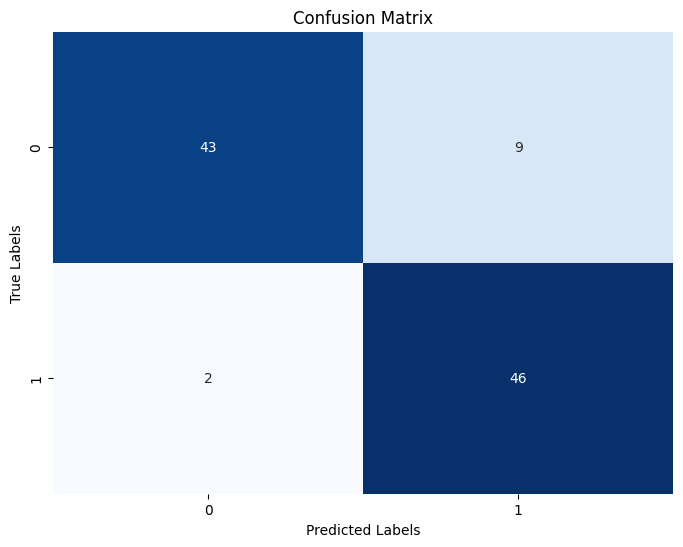

In [ ]:
svm_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = SVC(kernel='poly', degree=7, C=10)
model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))

Jumlah data train: 200
Jumlah data test: 100
Jumlah data validation: 100


Class: A
Sensitivity: 0.8913043478260869
Specificity: 0.9444444444444444
Accuracy: 0.92
F1-score: 0.91

Class: C
Sensitivity: 0.9444444444444444
Specificity: 0.8913043478260869
Accuracy: 0.92
F1-score: 0.93


Average Sensitivity: 0.92
Average Specificity: 0.92
Average Accuracy: 0.92
Average F1-score: 0.92
              precision    recall  f1-score   support

           A       0.93      0.89      0.91        46
           C       0.91      0.94      0.93        54

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



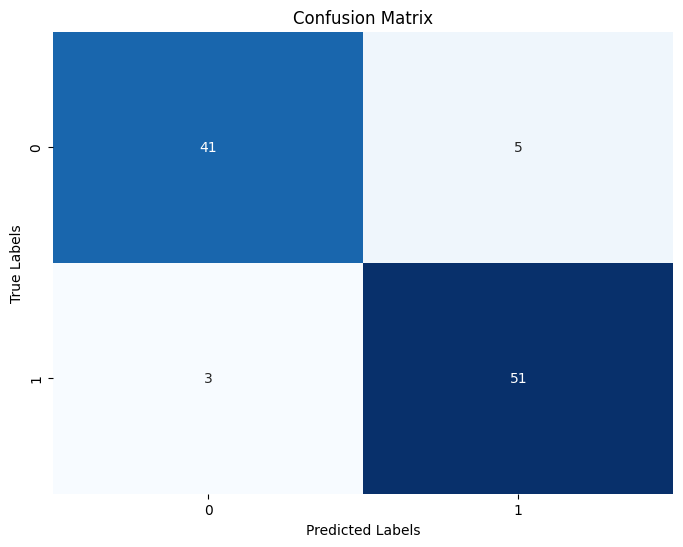

In [ ]:
svm_train_validation_test(model, X_test, y_test)

## KNN

### 10Fold CV

Class: A
Sensitivity: 0.83
Specificity: 0.875
Accuracy: 0.85
F1-score: 0.85

Class: C
Sensitivity: 0.875
Specificity: 0.83
Accuracy: 0.85
F1-score: 0.86


Average Sensitivity: 0.85
Average Specificity: 0.85
Average Accuracy: 0.85
Average F1-score: 0.85
              precision    recall  f1-score   support

           A       0.87      0.83      0.85       200
           C       0.84      0.88      0.86       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



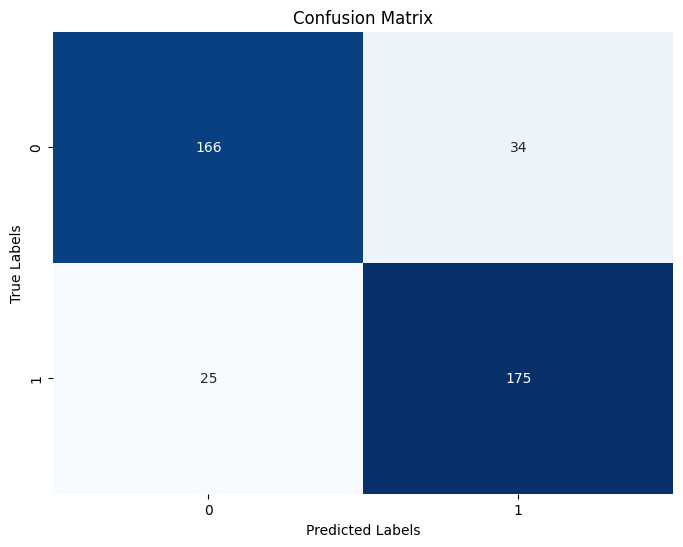

In [ ]:
knn_cv(X, y)

### 75% Train, 25% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 300
Jumlah data test: 100


KNeighborsClassifier()

Class: A
Sensitivity: 0.8076923076923077
Specificity: 0.9166666666666666
Accuracy: 0.86
F1-score: 0.86

Class: C
Sensitivity: 0.9166666666666666
Specificity: 0.8076923076923077
Accuracy: 0.86
F1-score: 0.86


Average Sensitivity: 0.86
Average Specificity: 0.86
Average Accuracy: 0.86
Average F1-score: 0.86
              precision    recall  f1-score   support

           A       0.91      0.81      0.86        52
           C       0.81      0.92      0.86        48

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.86      0.86       100



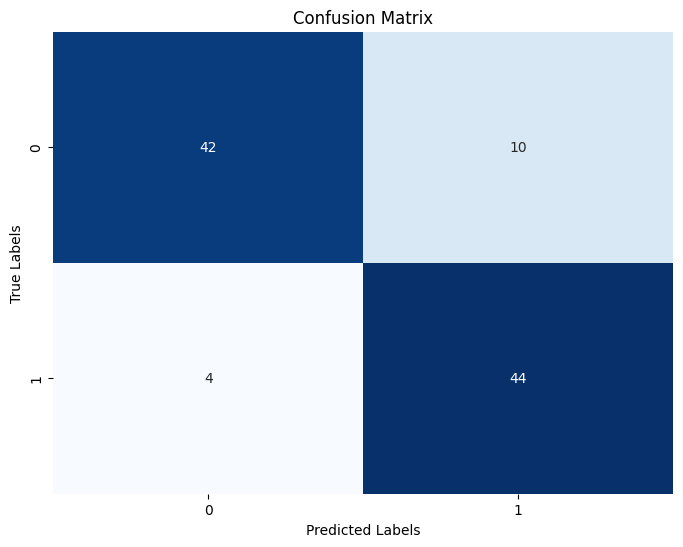

In [ ]:
knn_train_test(model, X_test, y_test)

### 50% Train, 25% Validation, 25% Test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 200
Jumlah data test: 100
Jumlah data validation: 100


KNeighborsClassifier()

Class: A
Sensitivity: 0.8913043478260869
Specificity: 0.8888888888888888
Accuracy: 0.89
F1-score: 0.88

Class: C
Sensitivity: 0.8888888888888888
Specificity: 0.8913043478260869
Accuracy: 0.89
F1-score: 0.90


Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.89
Average F1-score: 0.89
              precision    recall  f1-score   support

           A       0.87      0.89      0.88        46
           C       0.91      0.89      0.90        54

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



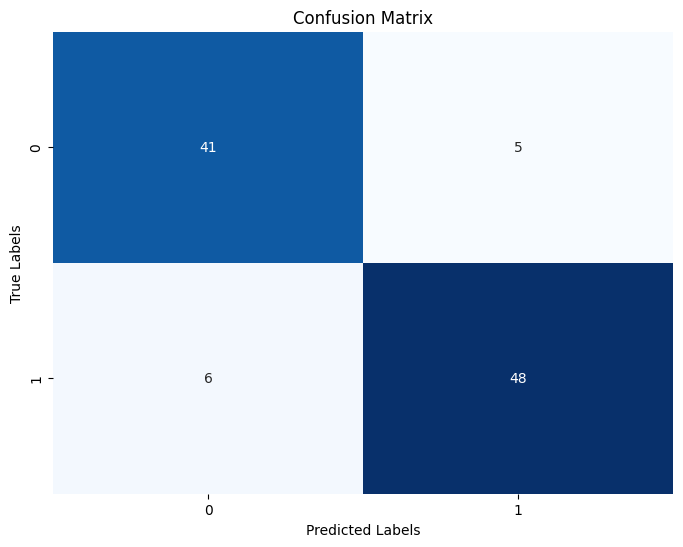

In [ ]:
knn_train_validation_test(model, X_test, y_test)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_val))
# Inisialisasi model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
model.fit(X_train, y_train)

Jumlah data train: 200
Jumlah data test: 100
Jumlah data validation: 100


KNeighborsClassifier()

Class: A
Sensitivity: 0.8913043478260869
Specificity: 0.8888888888888888
Accuracy: 0.89
F1-score: 0.88

Class: C
Sensitivity: 0.8888888888888888
Specificity: 0.8913043478260869
Accuracy: 0.89
F1-score: 0.90


Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.89
Average F1-score: 0.89
              precision    recall  f1-score   support

           A       0.87      0.89      0.88        46
           C       0.91      0.89      0.90        54

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



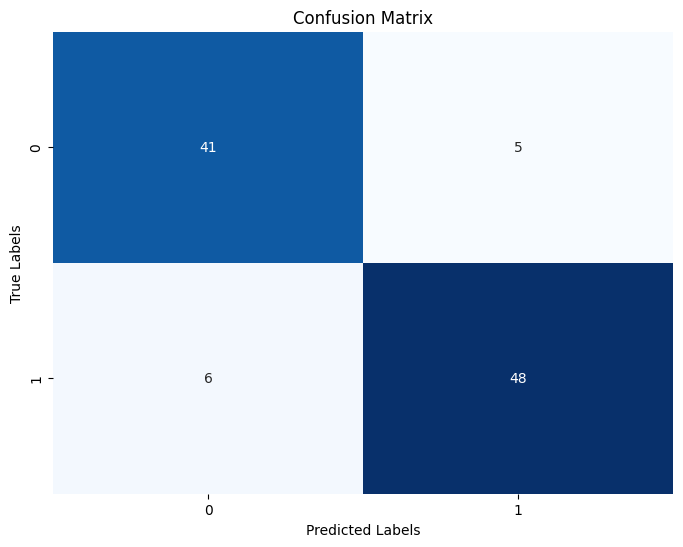

In [ ]:
knn_train_validation_test(model, X_test, y_test)